# Customer Churn - C744 Perfomance Assessment

## Importing required libraries, Data Collection & Data Exploration

### 1. Importing Required Libraries

In [1]:
# Data processesing, CSV I/O 
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

# Data Pre-processing, Model Building and Assessments
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling

from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm # Stats model for ANOVA
import statsmodels.formula.api as smf 

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_auc_score,roc_curve, precision_recall_curve

# For Tree visualization
from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import display

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### 2. Data Collection

In [2]:
# Notebook settings
pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows", 100)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
telecom = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
telecom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [4]:

# Get the overview of data
telecom.info() 

## Obs: 
##  1. Out of all features, tenure, MonthlyCharges and TotalCharges looks like continuous variables. 
##        Need to explore more to decide type (categorical vs numerical) of each feature
##   1.1. Object type of TotalCharges is object. Need to change type to float for proper processing. 
##   1.2. SeniorCitizen is int64, but is a categorical feature (confirmed later by unique values)
##  2. 7043 observations and 21 features
##   2.1. 20 features (Predictor Variables) and 1 Dependent/Response variable - Churn -> 
##           since we need to predict finally if the customer would be retained or Churned based on features
## Need to check the individual statistics of the features and response variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Convert the type of TotalCharges & check for Missing Values
telecom["TotalCharges"] = telecom["TotalCharges"].apply(pd.to_numeric, downcast="float", errors="coerce")
telecom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
# Fix Missing entries in TotalCharges
telecom["TotalCharges"] = telecom["TotalCharges"].apply(pd.to_numeric, downcast="float", errors="coerce").fillna(0)
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
telecom["SeniorCitizen"] = telecom.SeniorCitizen.astype("str")

In [8]:
telecom.mean()

SeniorCitizen             inf
tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2279.734304
dtype: float64

In [10]:
# List number of unique entries in each of the feature
telecom.nunique()

## Obs: It is confirmed that tenure, MonthlyCharges and TotalCharges are numeric/continuous variables
##      The customerID feature is an identifier columns for each observation, with unique value for each observation.
##      Remaining 17 variables are categorical in nature.

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
# List unique entries in each of the features
telecom_columns = telecom.columns.tolist()
telecom_columns

for i in telecom_columns:
    print(i, ": ", telecom[i].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
SeniorCitizen :  ['0' '1']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' '

## Feature Engineering
##### Obs: Some categorical levels can be condensed to reduced the # of levels. e.g OnlineSecurity => No internet service - > can be converted to No

In [12]:
# Some categorical feature levels can be refined for a cleaner classification between catergory levels

# 1. Change "No internet service" to "No"
l_reduce_nointernet = ["OnlineSecurity", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", \
             "StreamingTV", "StreamingMovies"]

for cols in l_reduce_nointernet:
    telecom[cols] = telecom[cols].replace({"No internet service" : "No"})

# 2. Change "No phone service" to "No"
telecom["MultipleLines"] = telecom["MultipleLines"].replace({"No phone service": "No"})

# 3. Shorten PaymentMethod details
telecom["PaymentMethod"] = telecom["PaymentMethod"].replace({"Electronic check": "ECheck",
                                                             "Mailed check":"MCheck",
                                                             "Bank transfer (automatic)":"AutoBankTransfer",
                                                             "Credit card (automatic)":"AutoCreditCard"})

# 4. Shorten InternetService details
telecom["InternetService"] = telecom["InternetService"].replace({"Fiber optic" :"FiberOptic"})

#5. Shorten Contract details
telecom["Contract"] = telecom["Contract"].replace({"Month-to-month" :"Monthly", "One year":"1yr", "Two year":"2yr"})

In [13]:
# Convert Tenure into categorical feature levels
def tenure_conversion(df):
    if df["tenure"] <= 12:
        return "t_0-1"
    if (df["tenure"] > 12) & (df["tenure"] <= 24):
        return "t_1-2"
    if (df["tenure"] > 24) & (df["tenure"] <= 48):
        return "t_2-4"
    if (df["tenure"] > 48) & (df["tenure"] <= 60):
        return "t_4-5"
    if df["tenure"] > 60:
        return "t_5plus"
telecom["tenuregroup"] = telecom.apply(lambda x: tenure_conversion(x), axis=1)

In [14]:
# 1. Since converted to groups, tenure can be dropped
# 2. Since Customer ID is not adding any value to the analysis, it can be dropped 
telecom = telecom.drop(columns=["tenure", "customerID"],axis=1) 

In [15]:
# Check for Null values again to make sure all obersvations are okay
telecom.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenuregroup         0
dtype: int64

## Get Summary Statistics of the Data

In [16]:
#Get summary stats for all continious variables
telecom.describe() 

## Obs: 

MonthlyCharges  TotalCharges
count     7043.000000   7043.000000
mean        64.761692   2279.734304
std         30.090047   2266.794471
min         18.250000      0.000000
25%         35.500000    398.549988
50%         70.350000   1394.550049
75%         89.850000   3786.599976
max        118.750000   8684.799805

In [17]:
## Box-Plot to understand Outliers on continuous variables

# 1. Tenure
#telecom["tenure"].plot(kind="box", color = "r")

## Obs: No Outliers

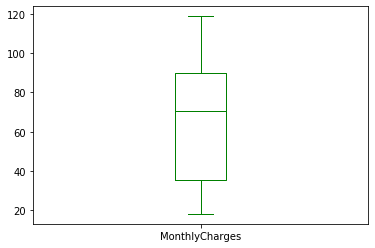

In [17]:
#2. MonthlyCharges
telecom["MonthlyCharges"].plot(kind="box", color = "g")

## Obs: No Outliers

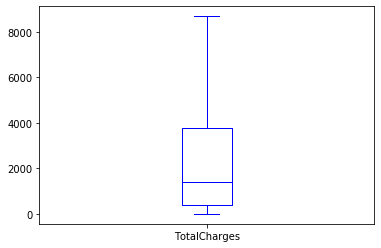

In [18]:
#3. TotalCharges
telecom["TotalCharges"].plot(kind="box", color = "b")

## Obs: No Outliers

## Check the summary & distribution of data

### Summary of Features & Response Variables

Percentage of Retained Customers: 73.46%
Percentage of Churn Customers: 26.54%


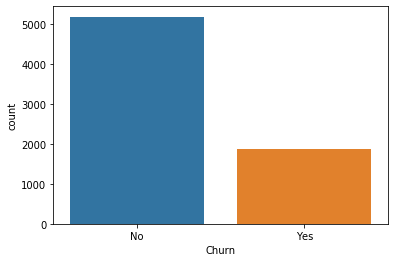

In [19]:
sns.countplot(data=telecom, x="Churn")


count_no = len(telecom[telecom["Churn"] == "No"])
count_yes = len(telecom[telecom["Churn"] == "Yes"])

print(f"Percentage of Retained Customers: {count_no/(count_no+count_yes) :.2%}")
print(f"Percentage of Churn Customers: {count_yes/(count_no+count_yes) :.2%}")

# looks like an imbalaced data set - Need to handle this future steps during model building

In [20]:
#sns.distplot(telecom["MonthlyCharges"], kde = True)

#split categorical, numerical features, excluding customerID and Target Variable

cat_columns = telecom.nunique()[telecom.nunique() < 6].keys().tolist()
cat_columns = [col for col in cat_columns if col not in ["customerID"] + ["Churn"]]

num_columns = [col for col in telecom.columns if col not in cat_columns + ["customerID"] + ["Churn"]]

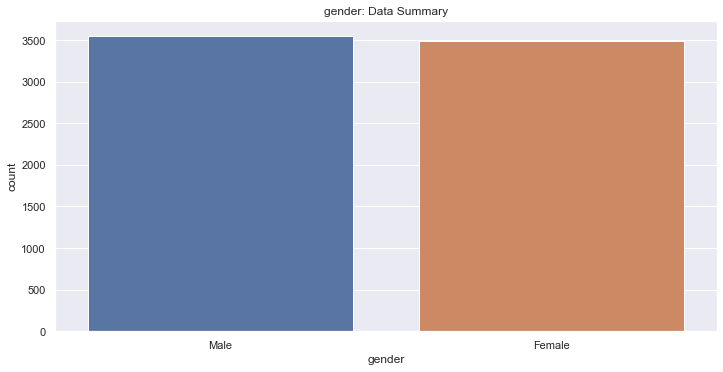

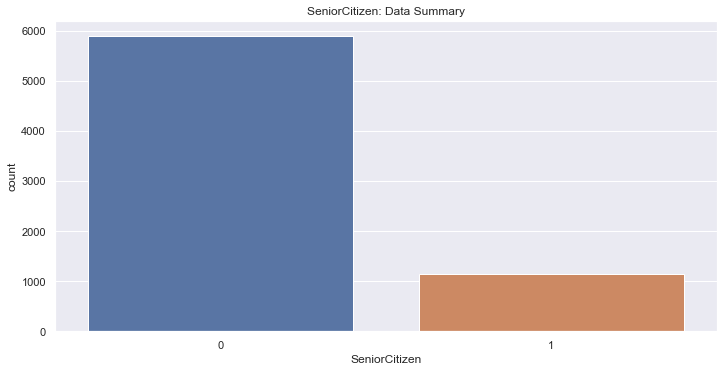

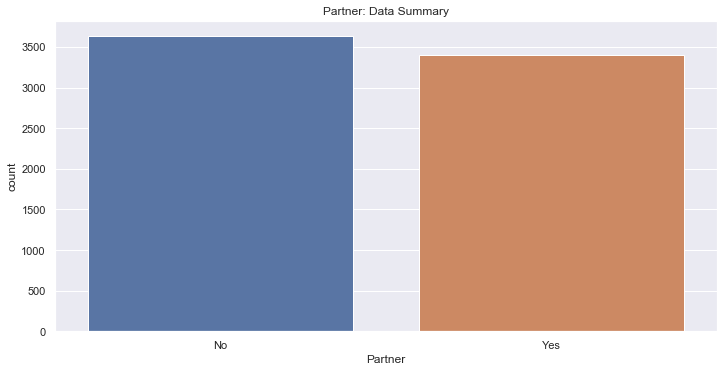

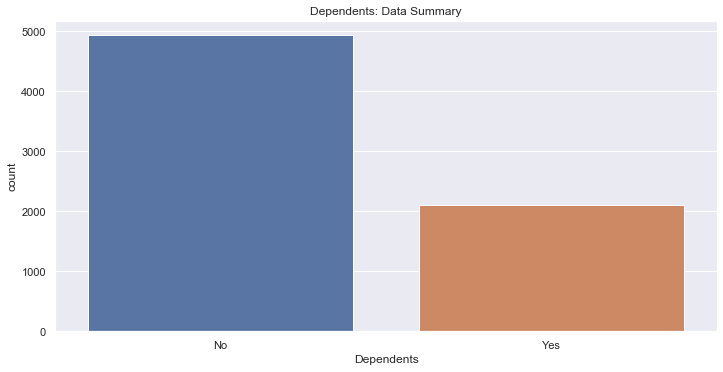

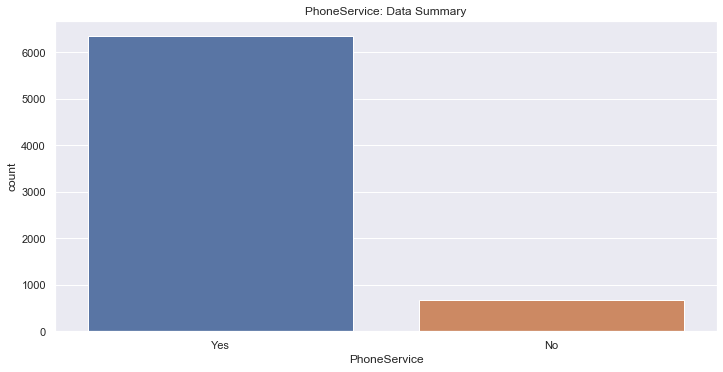

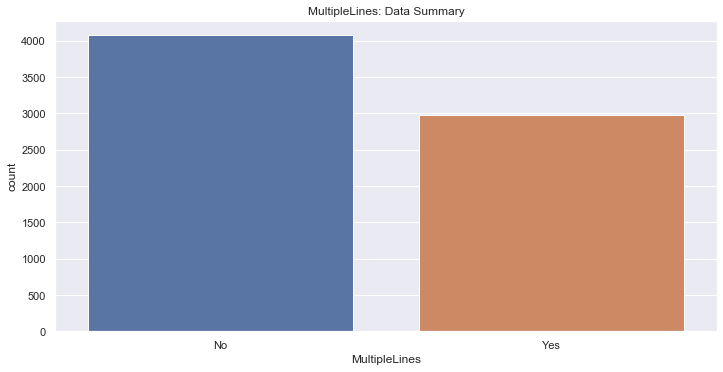

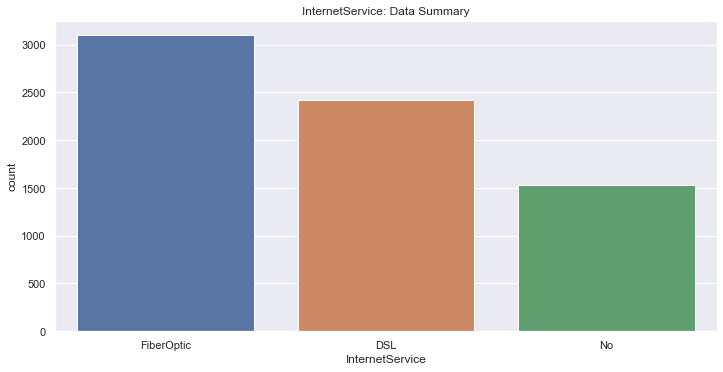

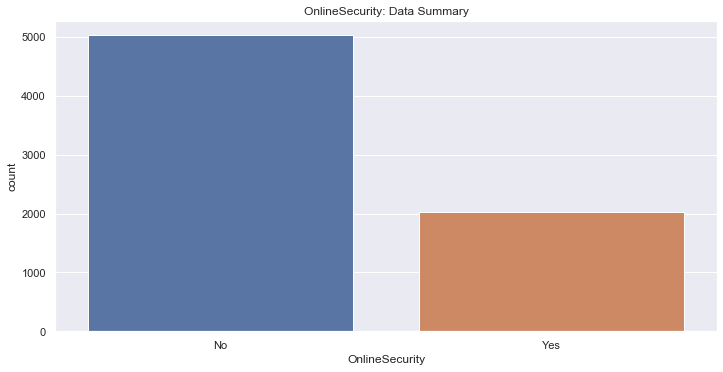

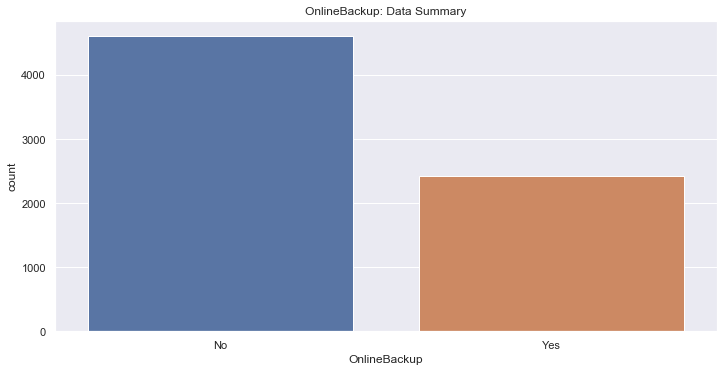

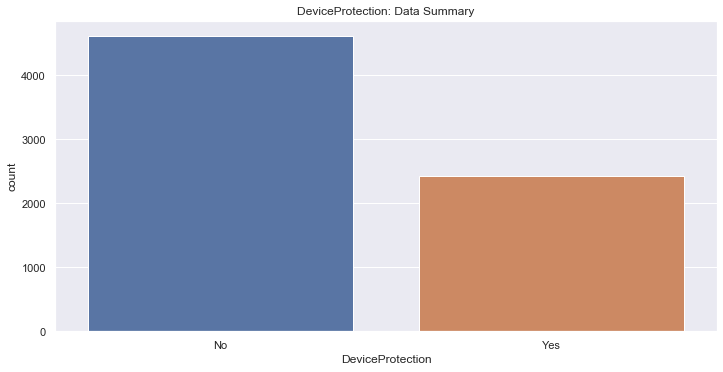

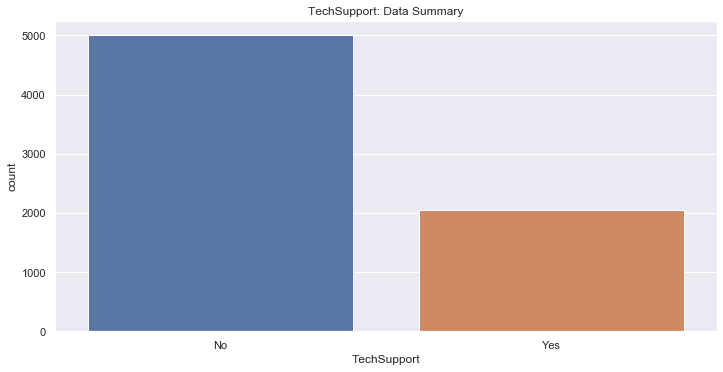

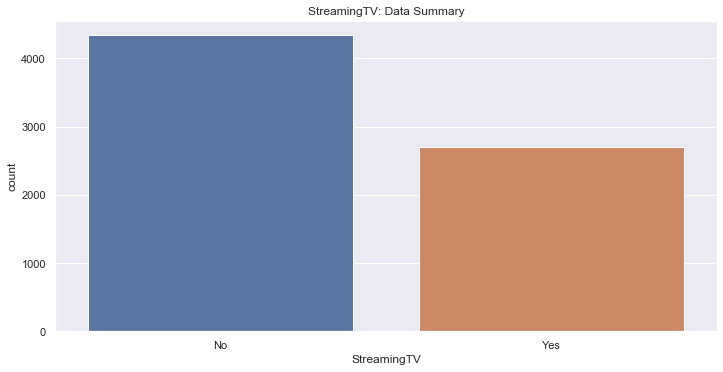

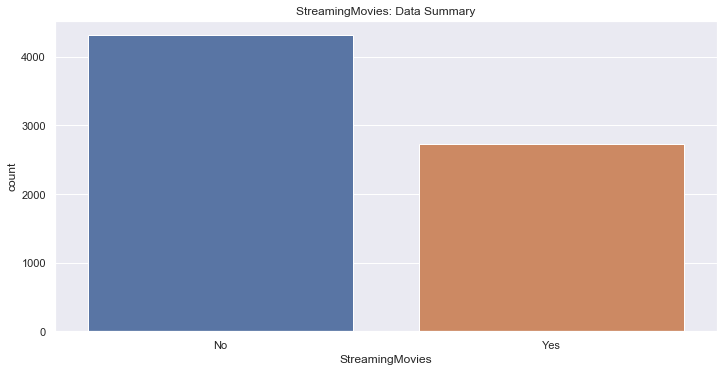

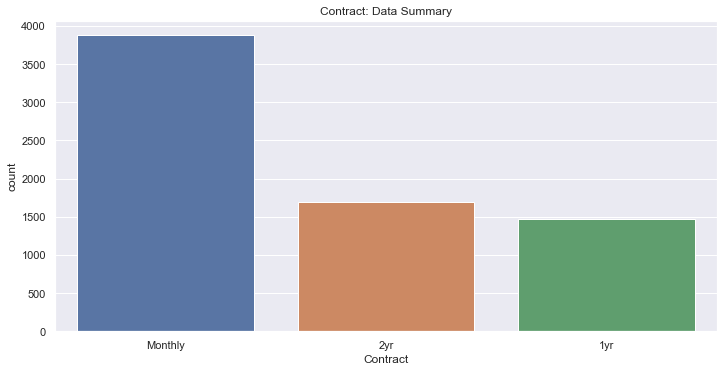

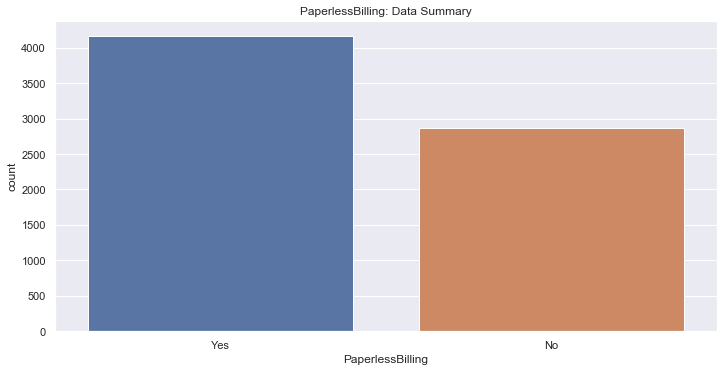

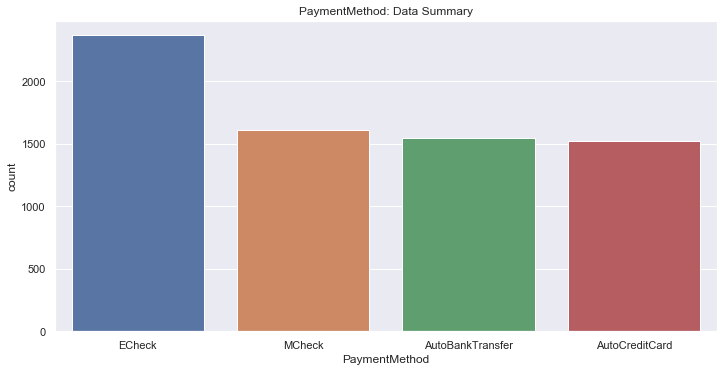

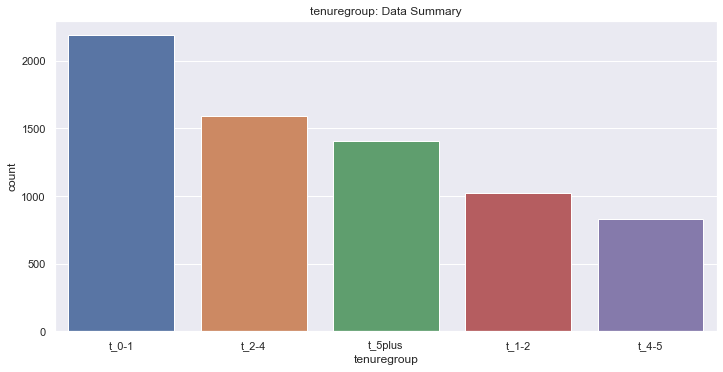

In [22]:
# Count Plot for all Categorical Features

fig,ax = plt.subplots(figsize=(5,7))
plt.close("all")
sns.set(font_scale=1)

for col in cat_columns:    
    plt.subplots(figsize=(10,5))
    #plt.figure()    
    plt.tight_layout()
    sns.countplot(x=col, data=telecom, order = telecom[col].value_counts().index).set_title(f"{col}: Data Summary")

# Will be plotted in Descending order of the value count by feature levels    
    
    

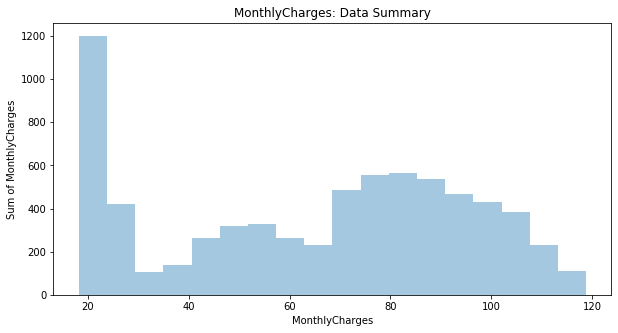

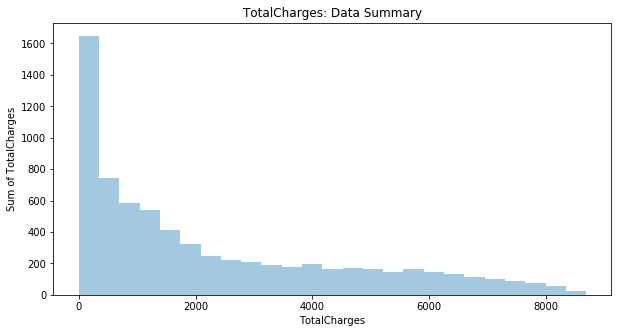

In [21]:
# Histogram and Density Plots for continuous features

#1. Histograms

for col in num_columns:    
    plt.figure(figsize=(10,5))    
    plt.tight_layout()
    sns.distplot(telecom[col], kde=False, hist=True).set_title(f"{col}: Data Summary")
    #plt.xlabel(col)
    plt.ylabel(f"Sum of {col}")

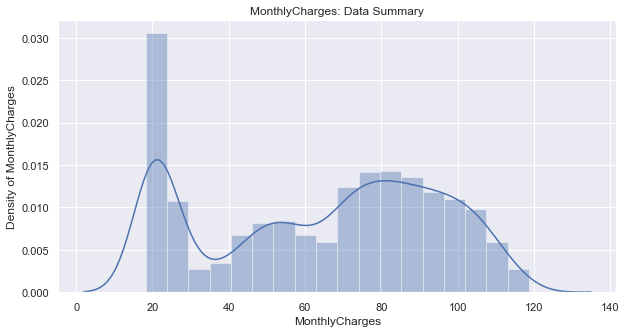

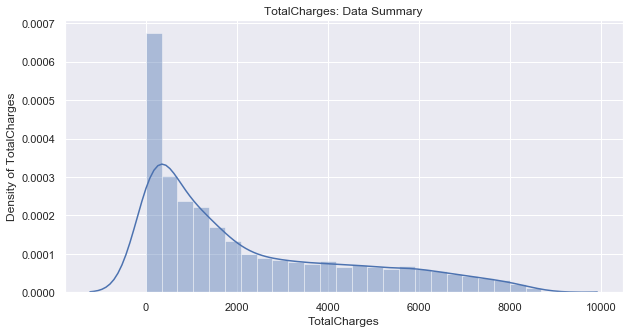

In [24]:
# 2. Density Plots

for col in num_columns:
    plt.figure(figsize=(10,5))    
    plt.tight_layout()
    sns.distplot(telecom[col], kde=True, hist=True).set_title(f"{col}: Data Summary")
    plt.ylabel(f"Density of {col}")

In [26]:
# Check Percentage of Retained vs Churned Customers from the Data Set
retain_count = len(telecom[telecom["Churn"]=="No"])
churn_count = len(telecom[telecom["Churn"]=="Yes"])

print(f"Percentage of Retained Customers is: {(retain_count/(retain_count+churn_count)) :0.2%}")
print(f"Percentage of Churned Customers is: {(churn_count/(retain_count+churn_count)) :0.2%}")

## Obs: Classes are imbalanced and the ratio of retain to churn is 73:26

Percentage of Retained Customers is: 73.46%
Percentage of Churned Customers is: 26.54%


In [27]:
## Check Means with respect to the Response variable
telecom.groupby("Churn").mean() #Ignore SeniorCitizen

#Obs: 
# 1. Avg. tenure for churn customer is lower than retained customers by 20 months
# 2. Avg. Monthly Charges for churned customer is higher than retained customers by 10.2
# 3. Avg. Total Charges for Churned customer is lower than retained customers by 1018.12 
#      => ties in since avg tenure for churn is lower

MonthlyCharges  TotalCharges
Churn                              
No          61.265124   2549.911443
Yes         74.441332   1531.796092

In [ ]:
# Calculate Categorical for other categorical variables 

In [28]:
# Similar observations can be made for rest of the categorical means
for col in cat_columns:
    print(f"\033[1m {col} Avg: \033[0;0m\n {telecom.groupby(col).mean()} \n")

 gender Avg: 
         MonthlyCharges  TotalCharges
gender                              
Female       65.204243   2279.918064
Male         64.327482   2279.554007 

 SeniorCitizen Avg: 
                MonthlyCharges  TotalCharges
SeniorCitizen                              
0                   61.847441   2177.023801
1                   79.820359   2810.465195 

 Partner Avg: 
          MonthlyCharges  TotalCharges
Partner                              
No            61.945001   1584.089812
Yes           67.776264   3024.249764 

 Dependents Avg: 
             MonthlyCharges  TotalCharges
Dependents                              
No               67.002808   2187.709255
Yes              59.522156   2494.881019 

 PhoneService Avg: 
               MonthlyCharges  TotalCharges
PhoneService                              
No                 42.028592   1496.033650
Yes                67.199041   2363.759433 

 MultipleLines Avg: 
                MonthlyCharges  TotalCharges
MultipleLines      

## Visualizations - Feature by each Response Variable class

In [29]:
## Distribution of Frequency by each class of Response variable, for all Categorical Features

churn_customers = telecom[telecom["Churn"] == "Yes"]
nochurn_customers = telecom[telecom["Churn"] == "No"]

In [30]:
# Use Matplotlib to plot the pie and histogram (with overlay) graphs
# Display frequency of each of the categorical feature by Churn level

sns.set(font_scale=2)
colors = ["lightskyblue", "lightcoral", "royalblue", "red", "green","yellowgreen", "gold", ]
def category_plots(colname):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,12))
    churn_dist = ax1.pie(churn_customers[colname].value_counts().values.tolist(), \
                         autopct = "%1.1f%%", \
                         startangle = 90, \
                         labels = churn_customers[colname].unique().tolist(), \
                         textprops={'size': 'small'}, colors = colors)

    nochurn_dist = ax2.pie(nochurn_customers[colname].value_counts().values.tolist(), \
                           autopct = "%1.1f%%", startangle = 90, \
                           labels = nochurn_customers[colname].unique().tolist(), \
                           textprops={'size': 'small'}, colors = colors)

    fig.suptitle(f"{colname} Churn vs Retention Distribution", verticalalignment = "baseline")
    fig = plt.gcf()

    ax1.set_title("Churned Customers", fontdict = {'verticalalignment': "top"}, loc = "center", pad = -10)
    ax2.set_title("Retained Customers", fontdict = {'verticalalignment': "top"}, loc = "center", pad = -10)

    plt.tight_layout()
    plt.show()

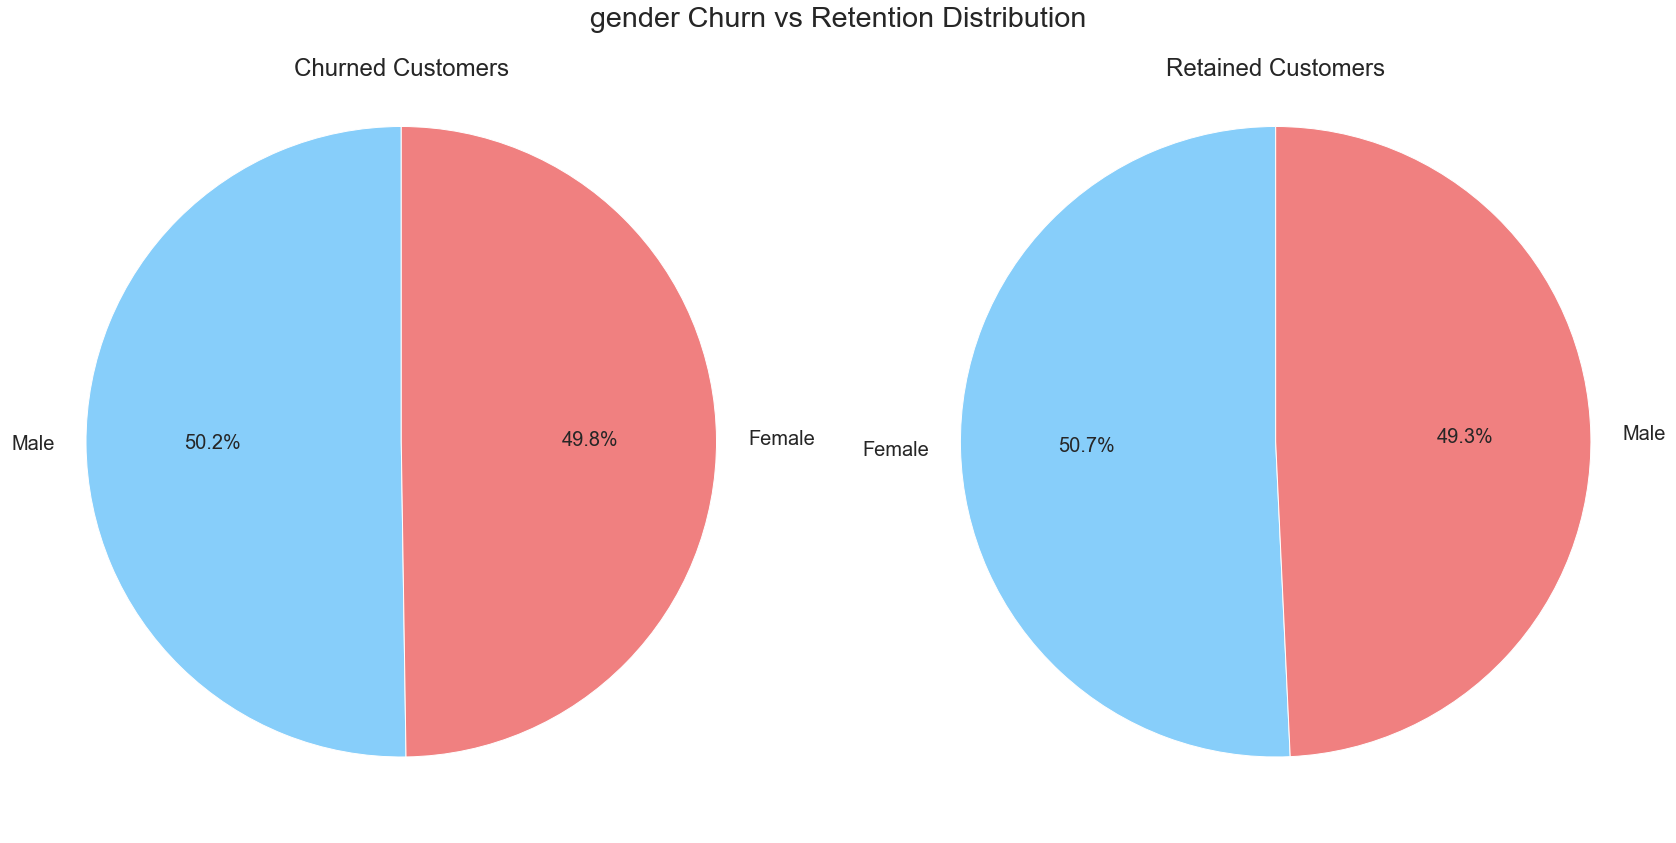

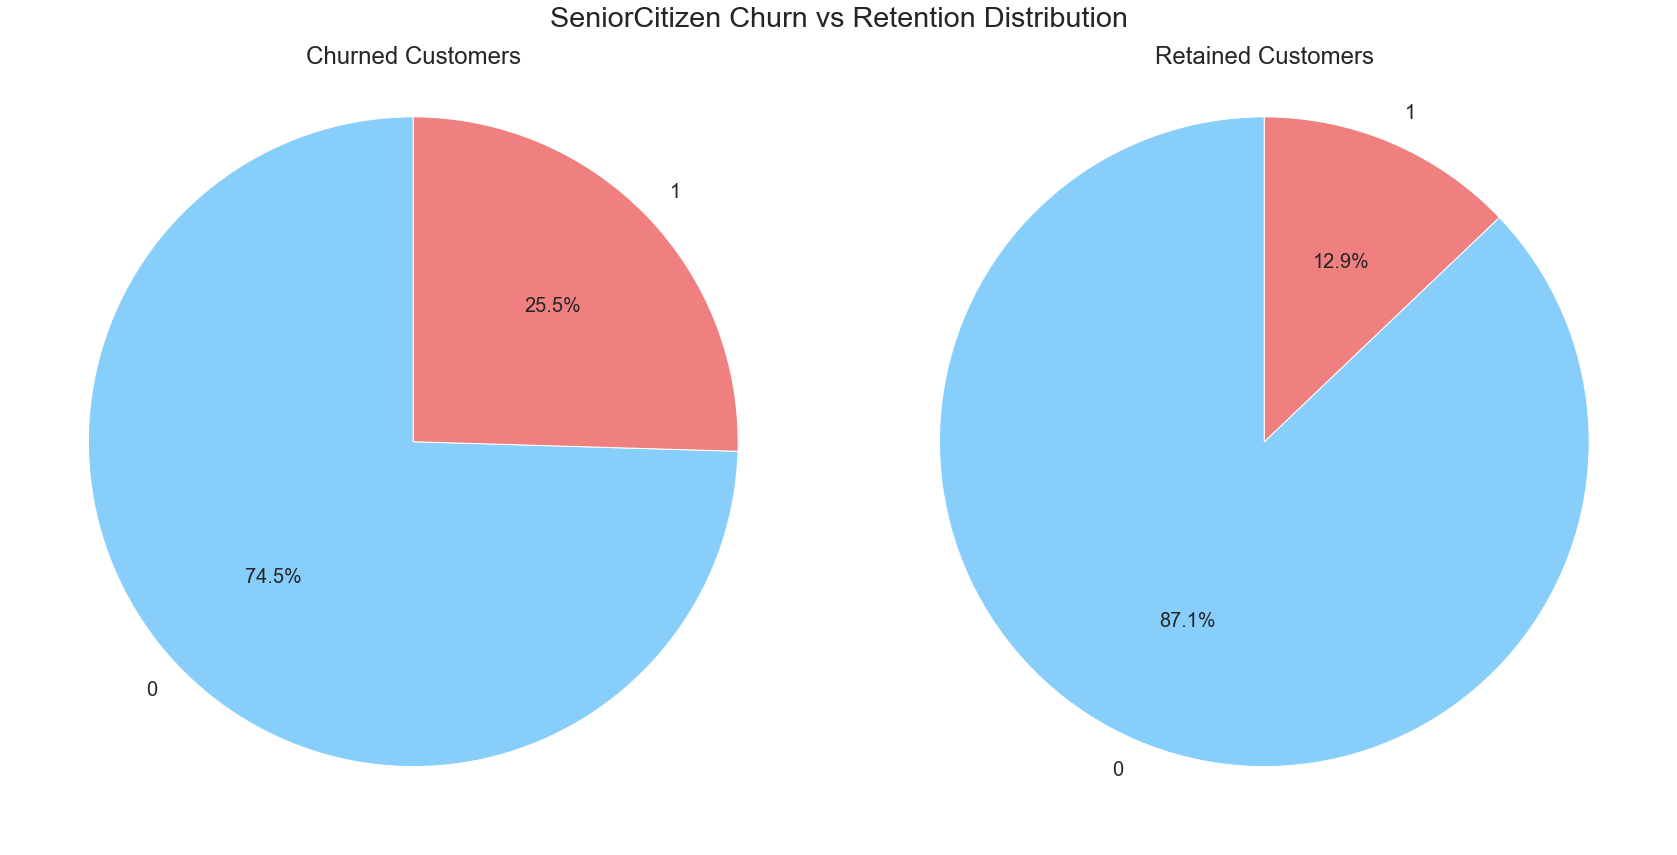

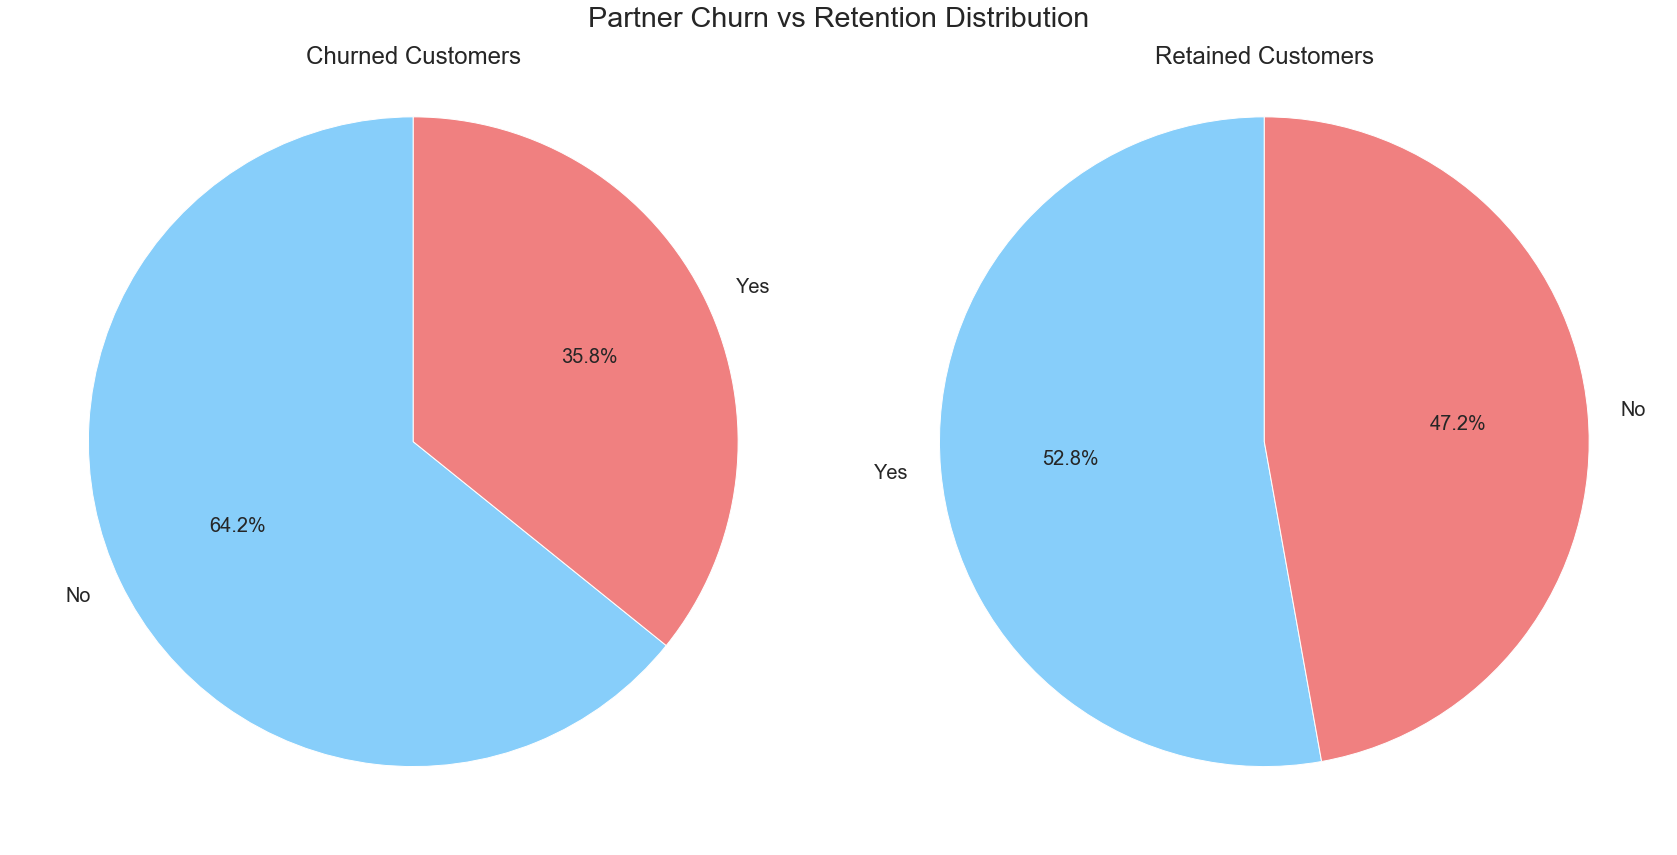

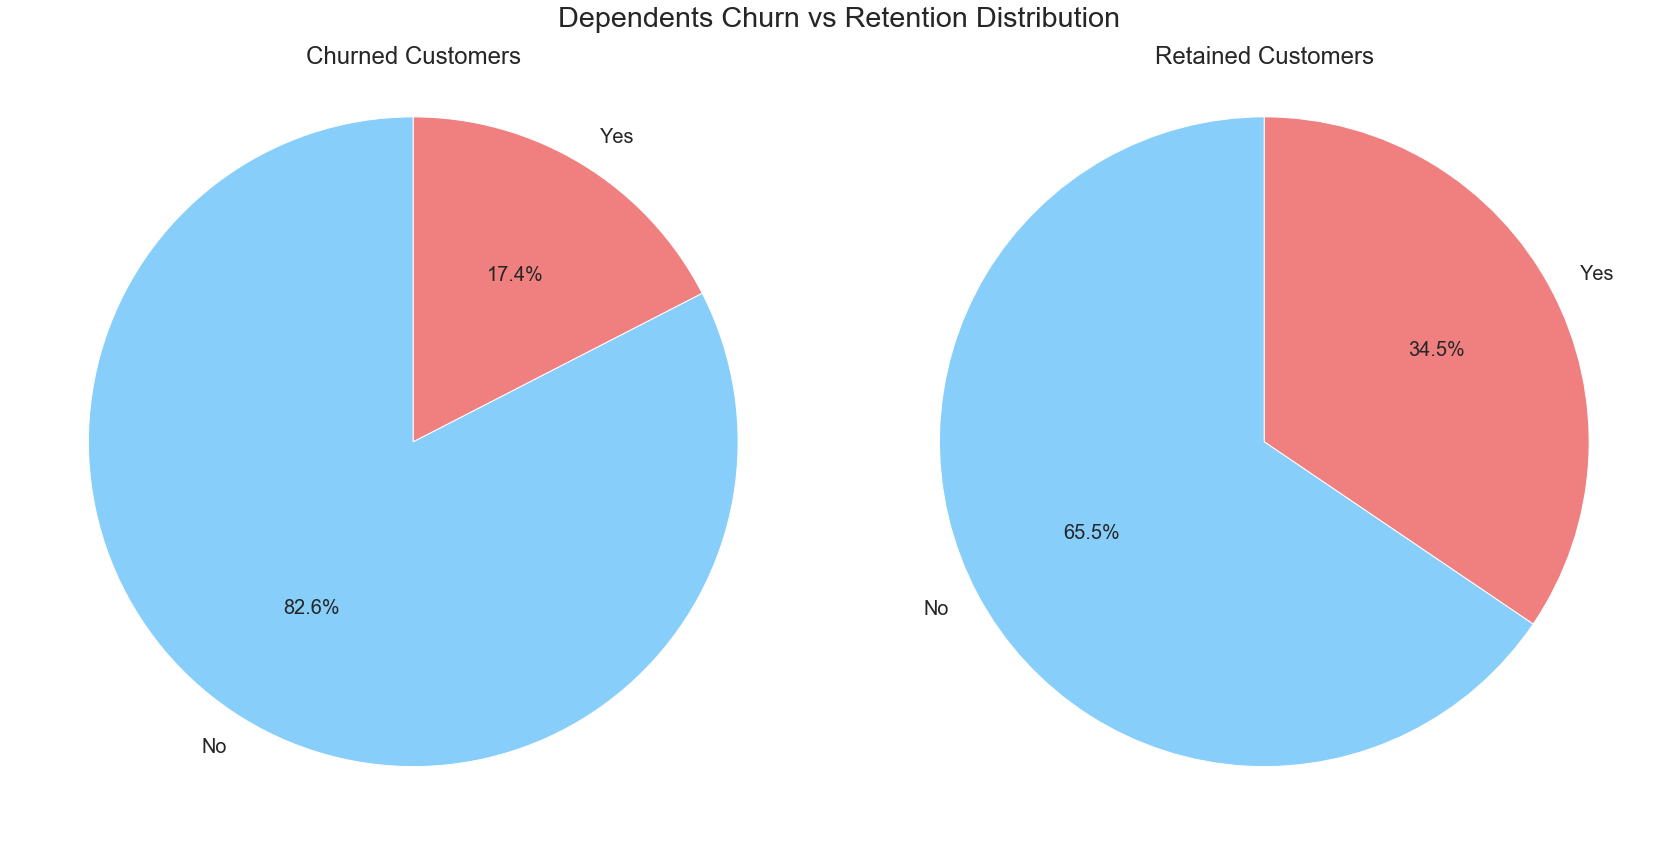

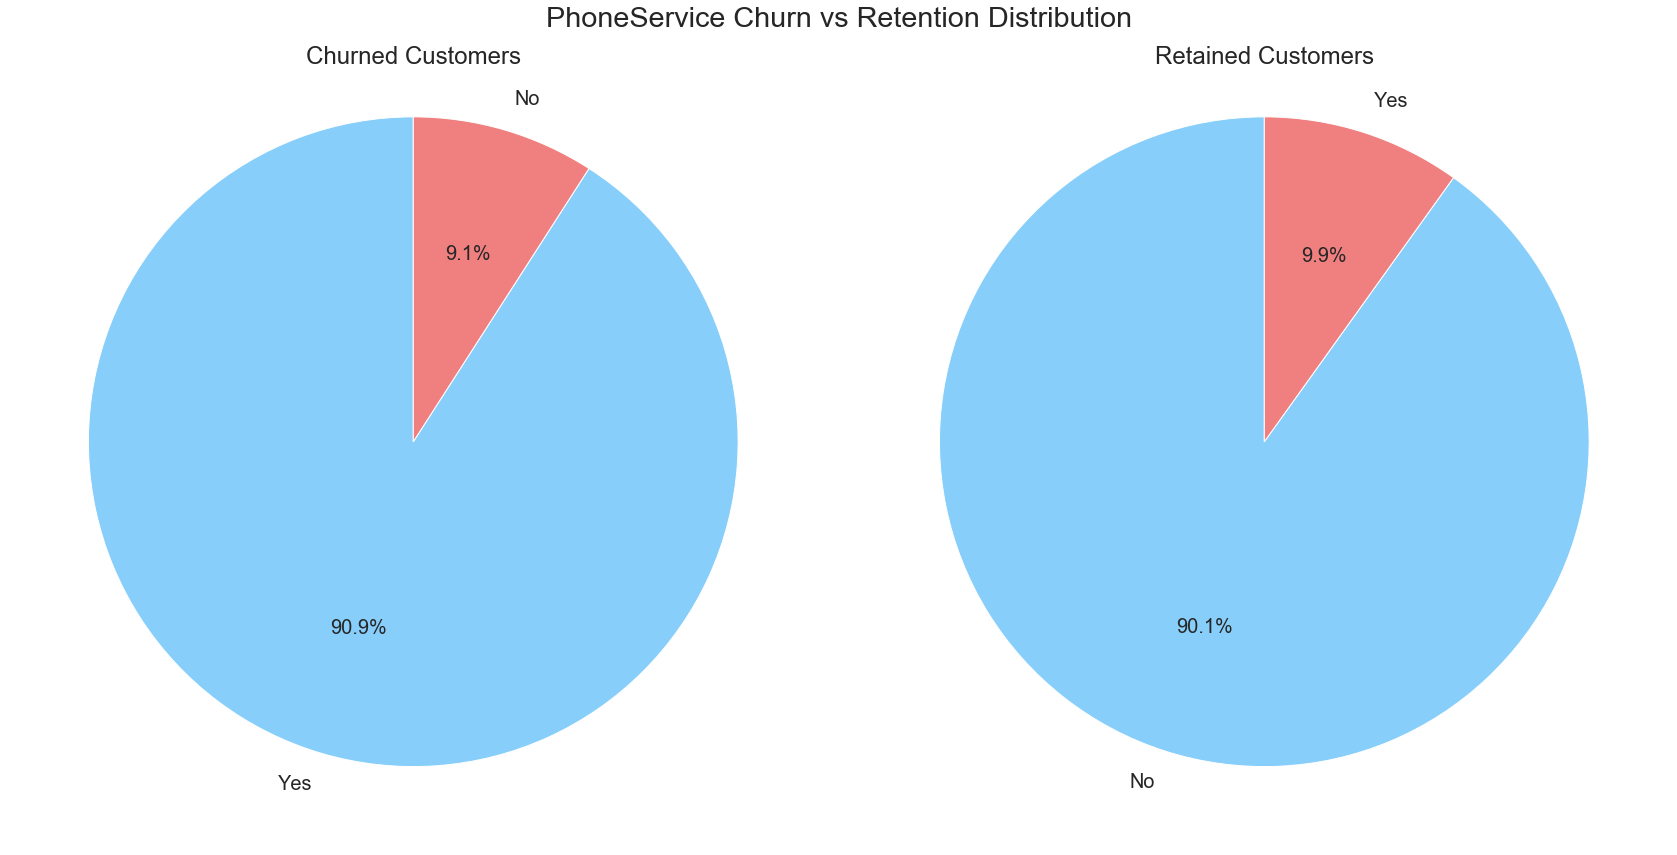

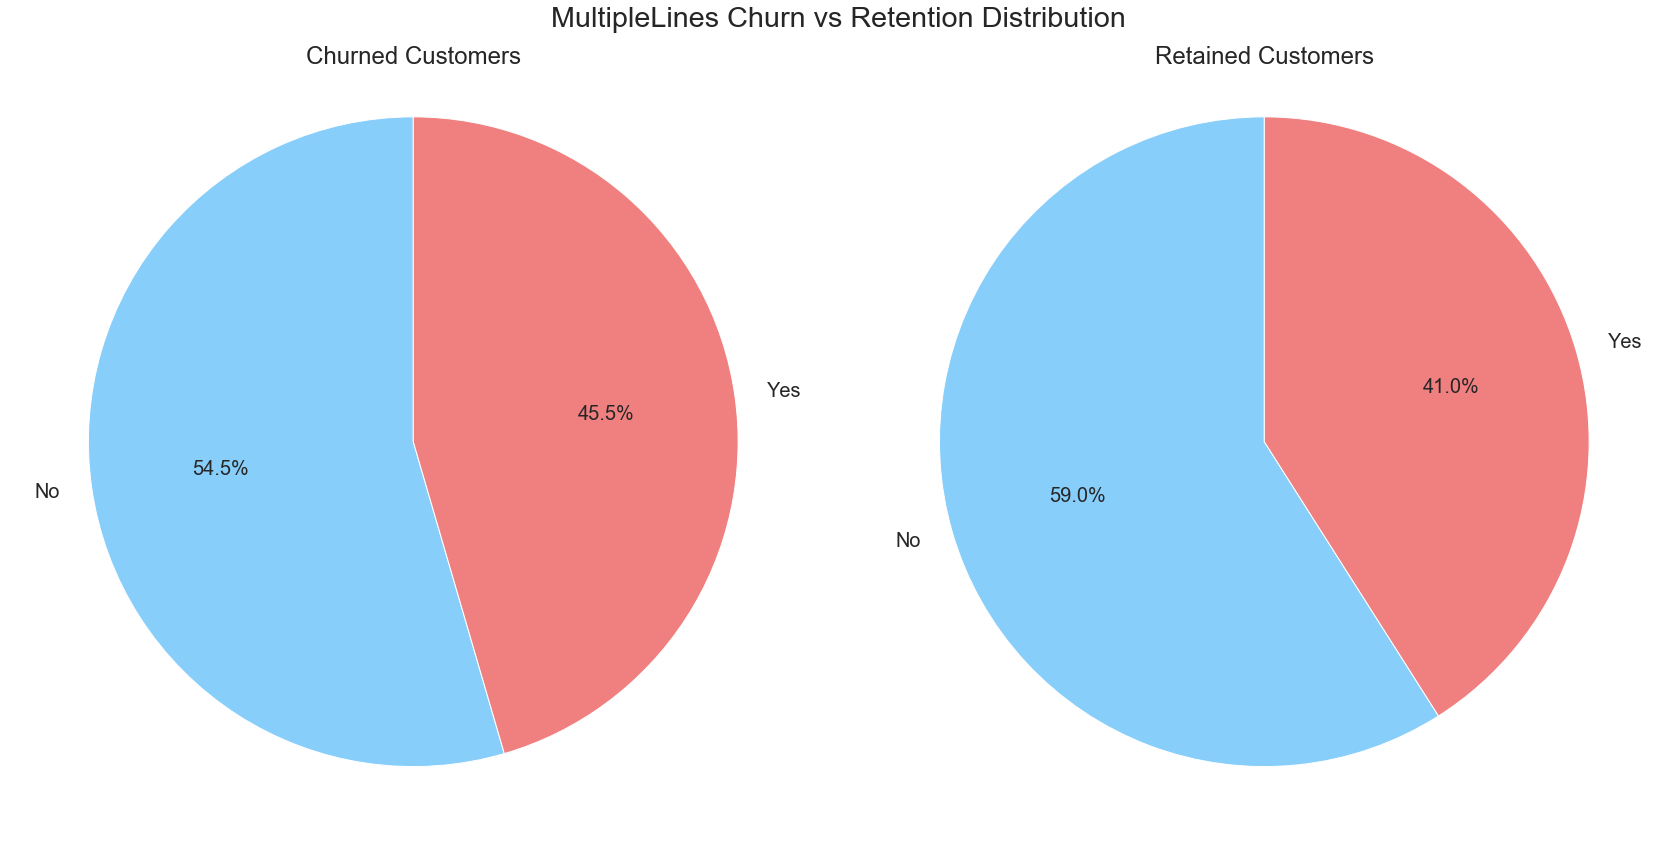

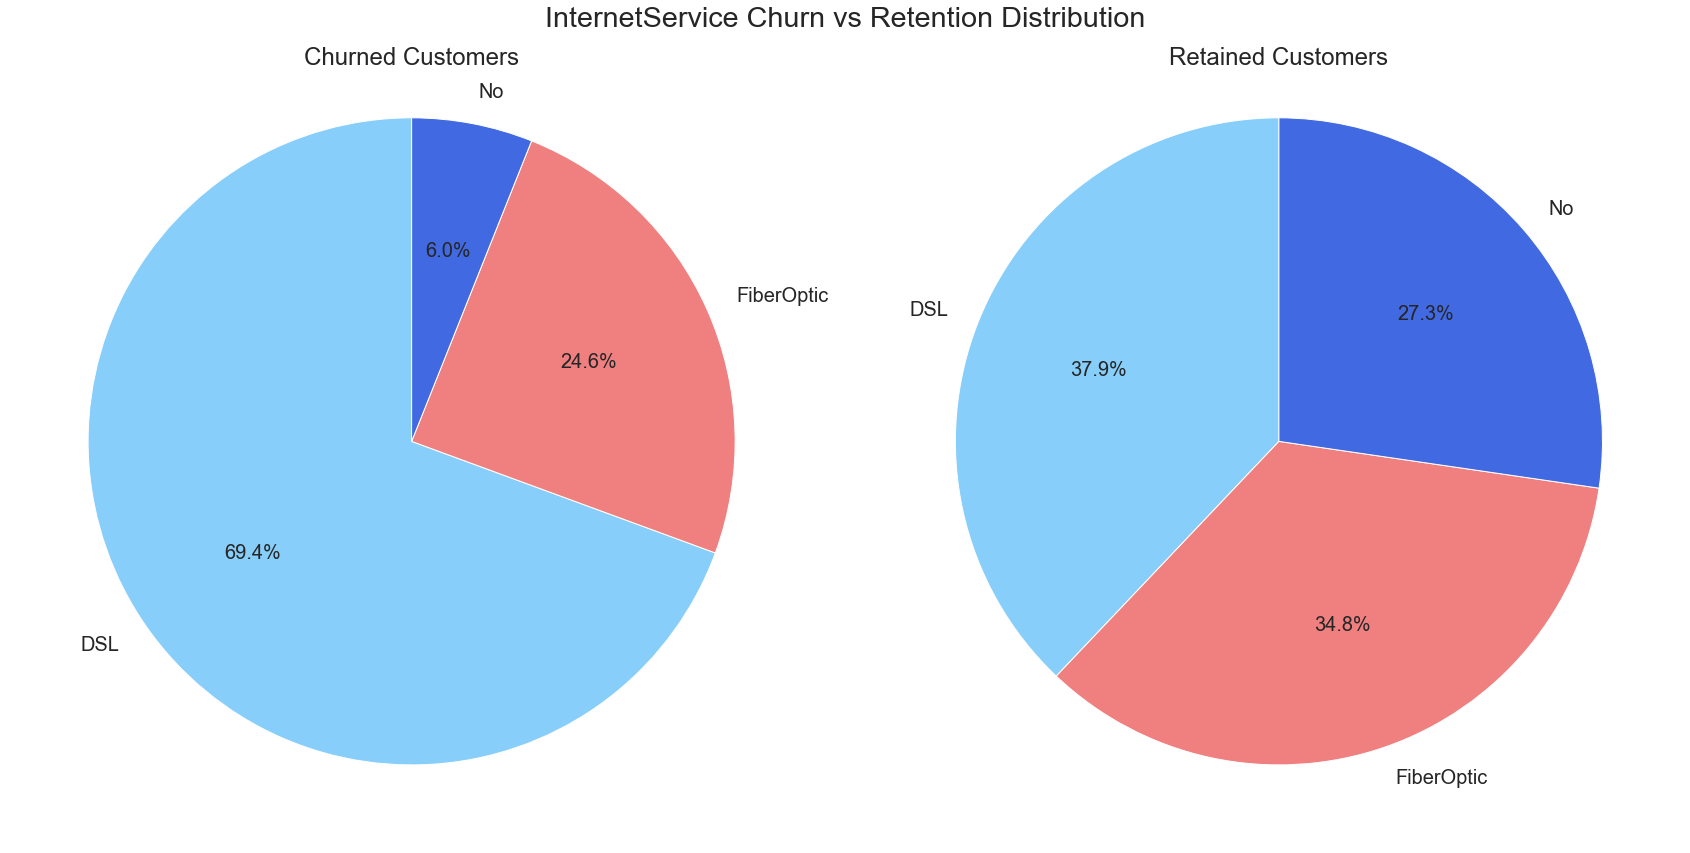

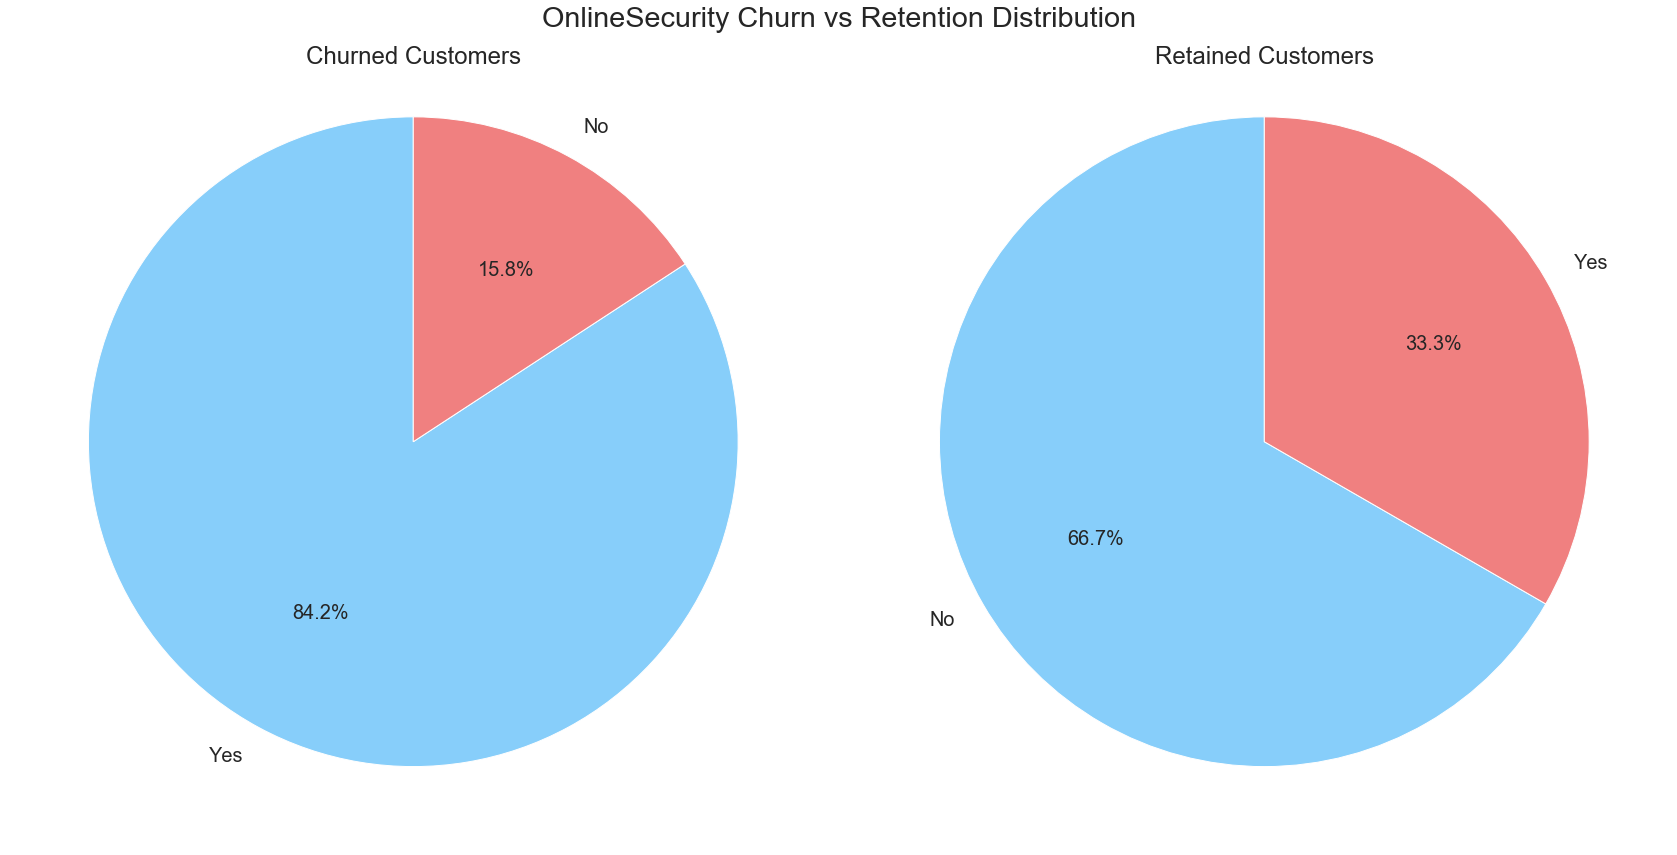

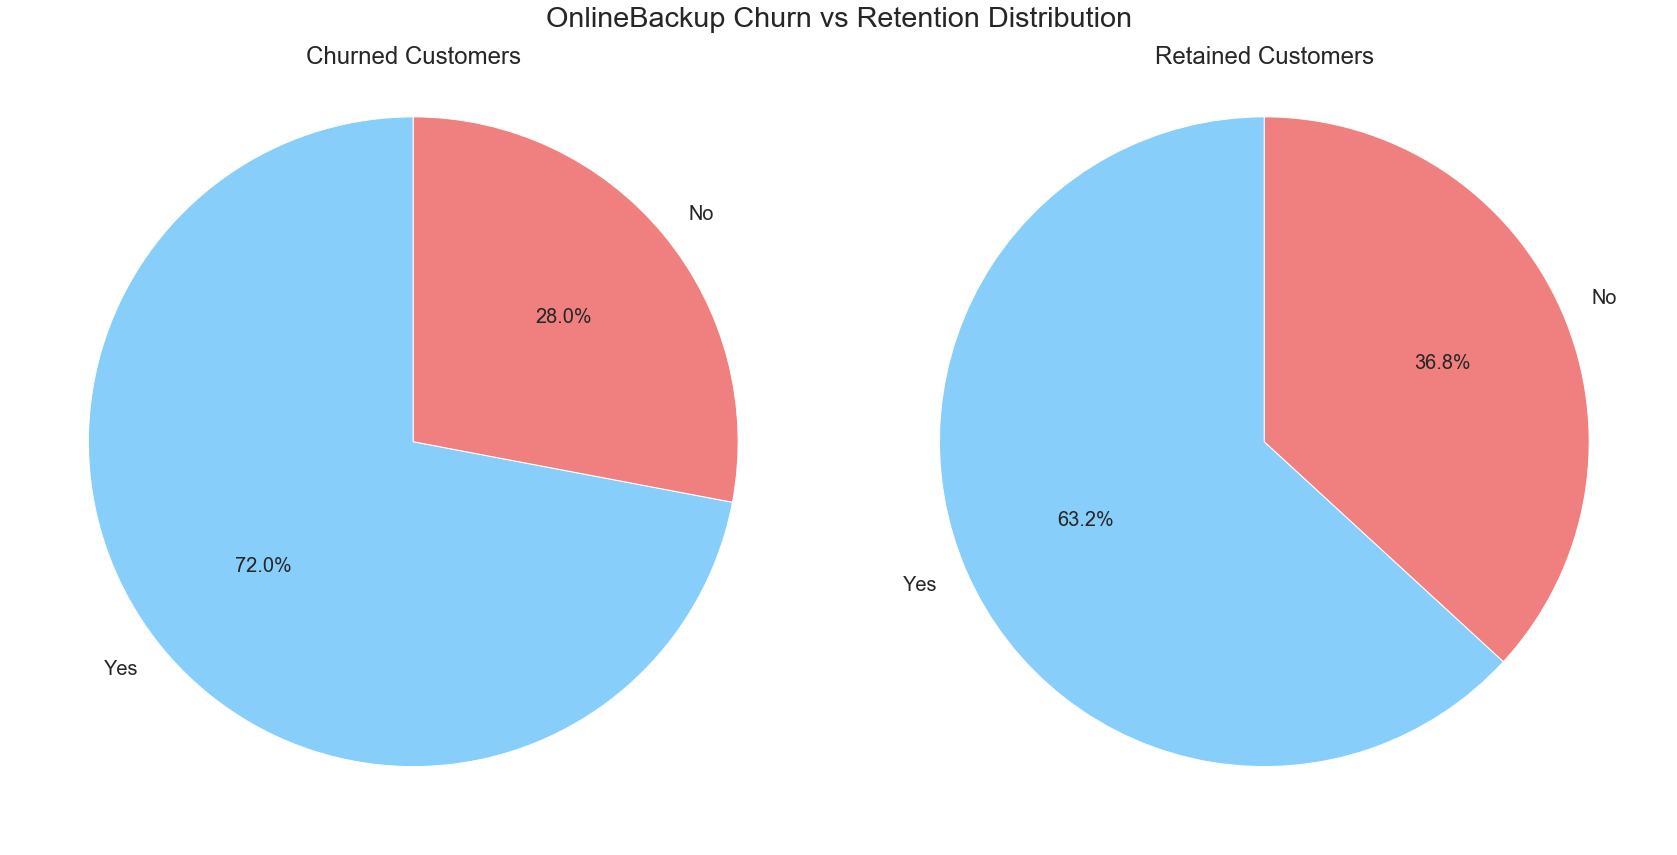

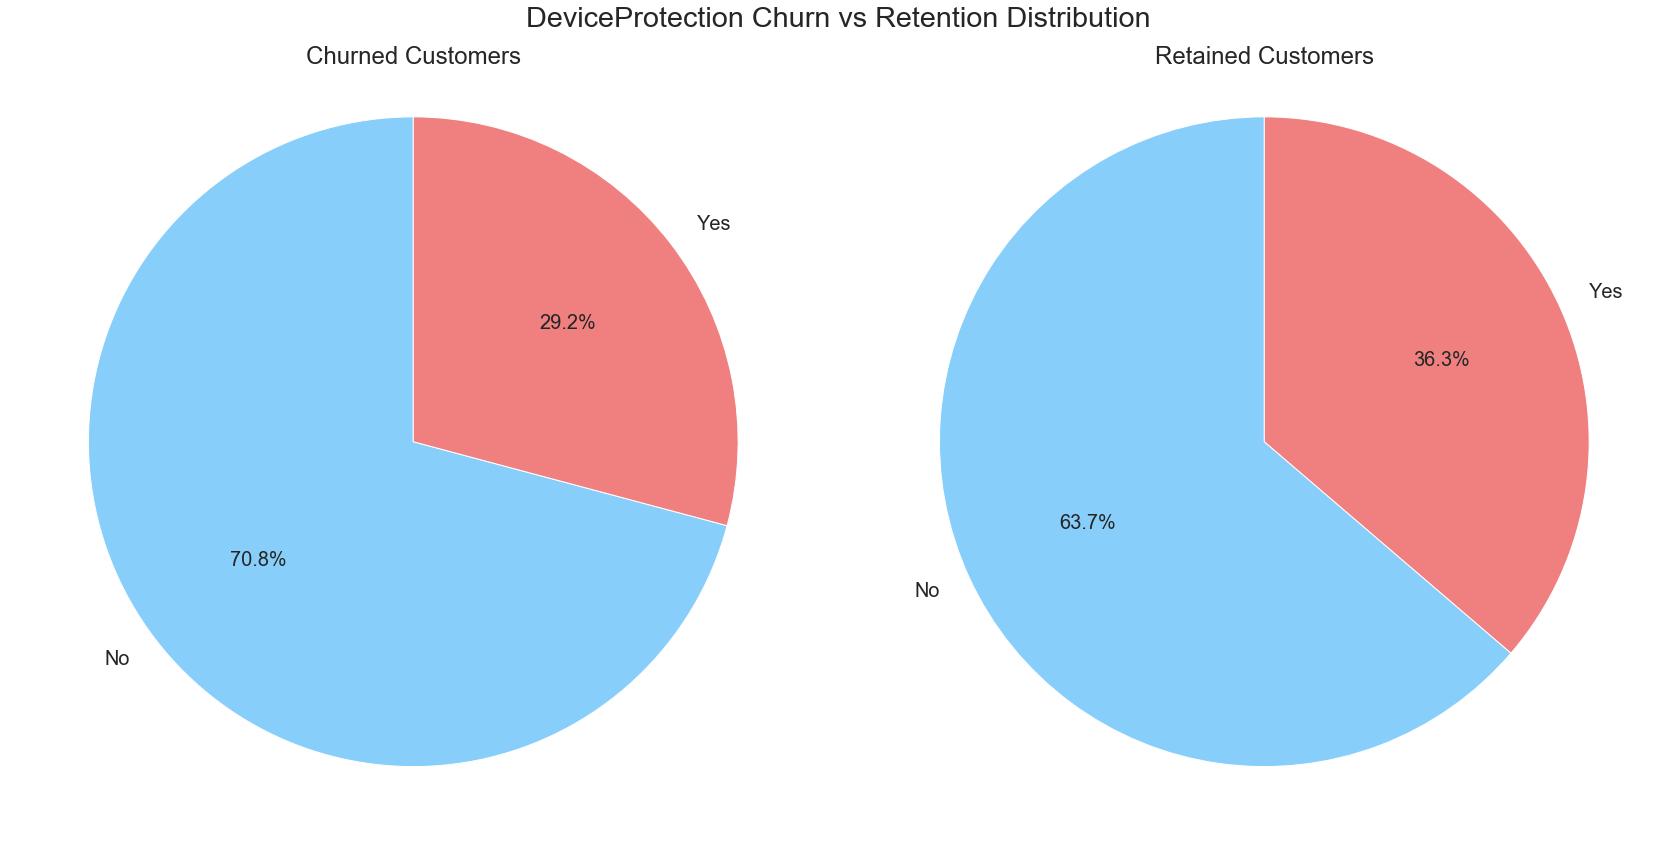

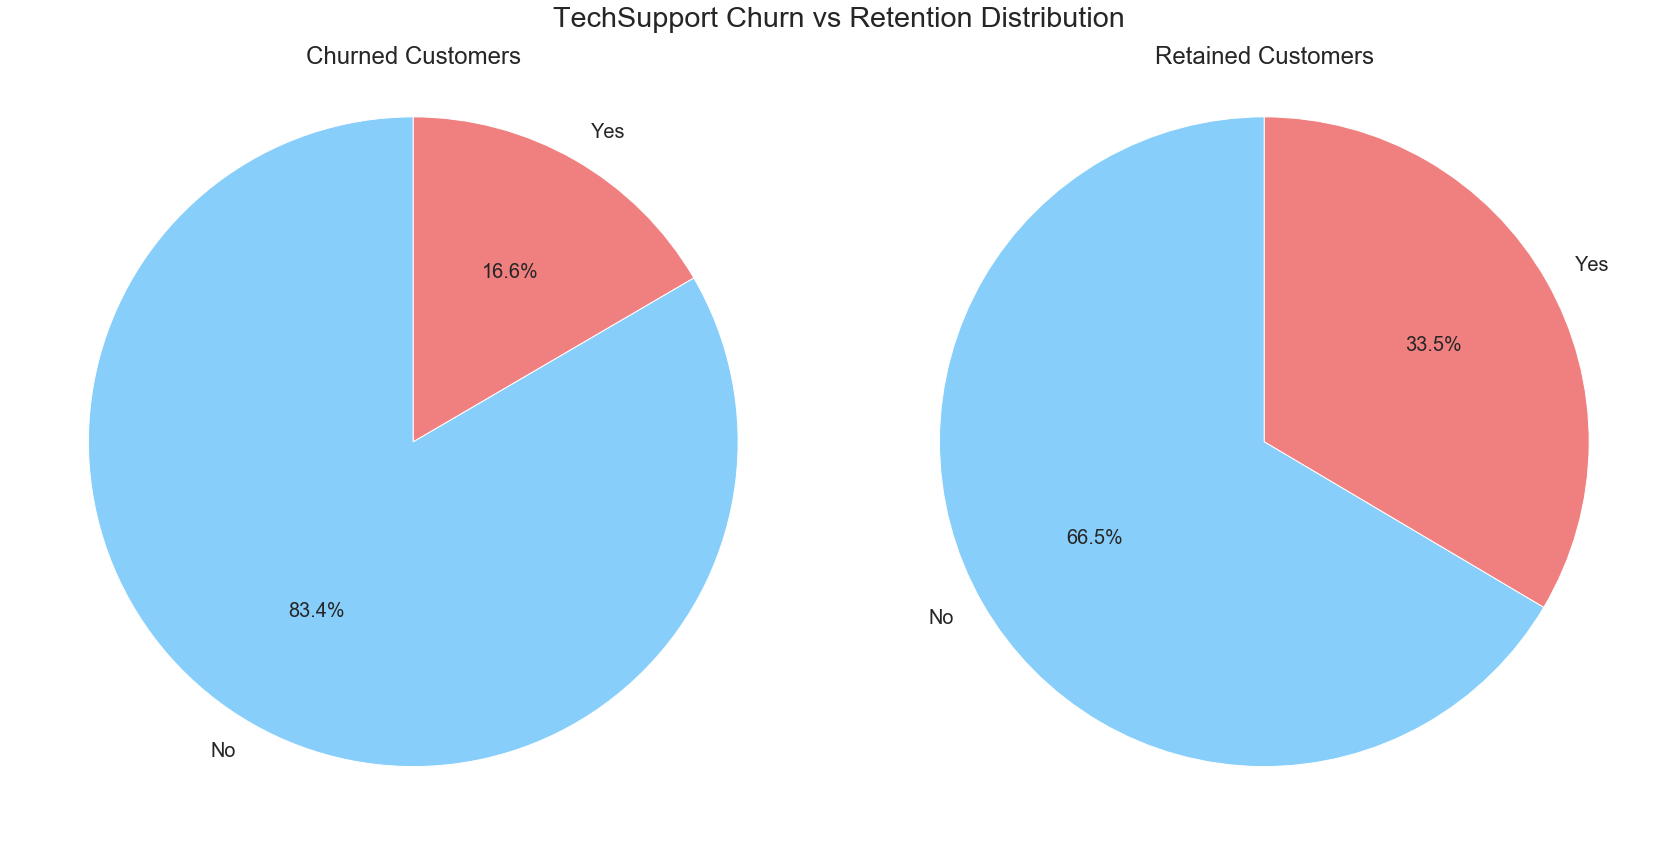

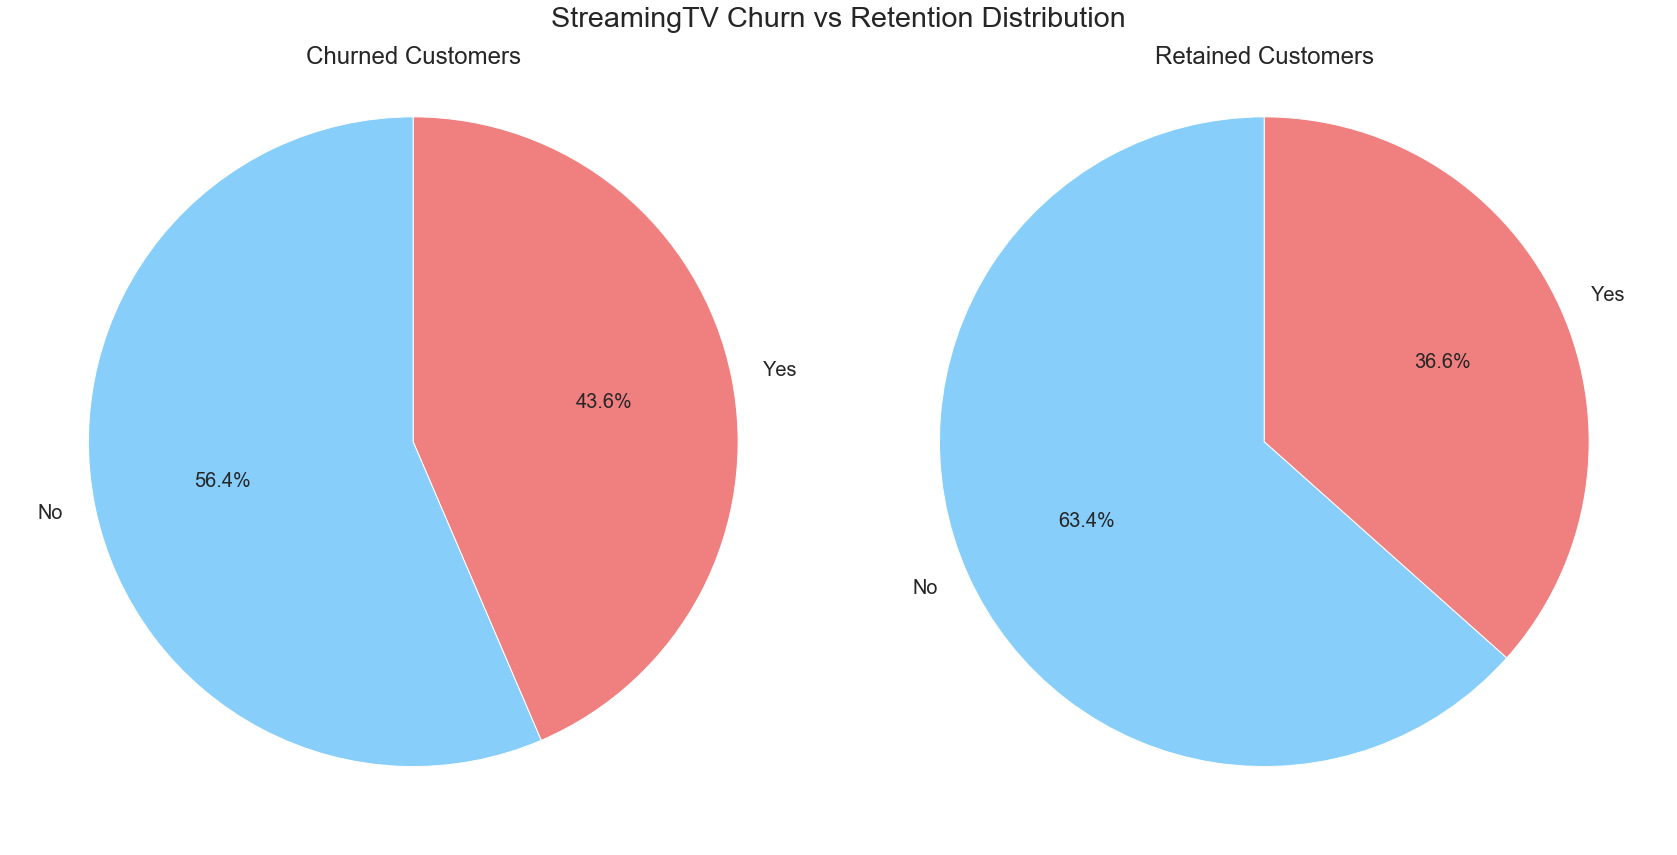

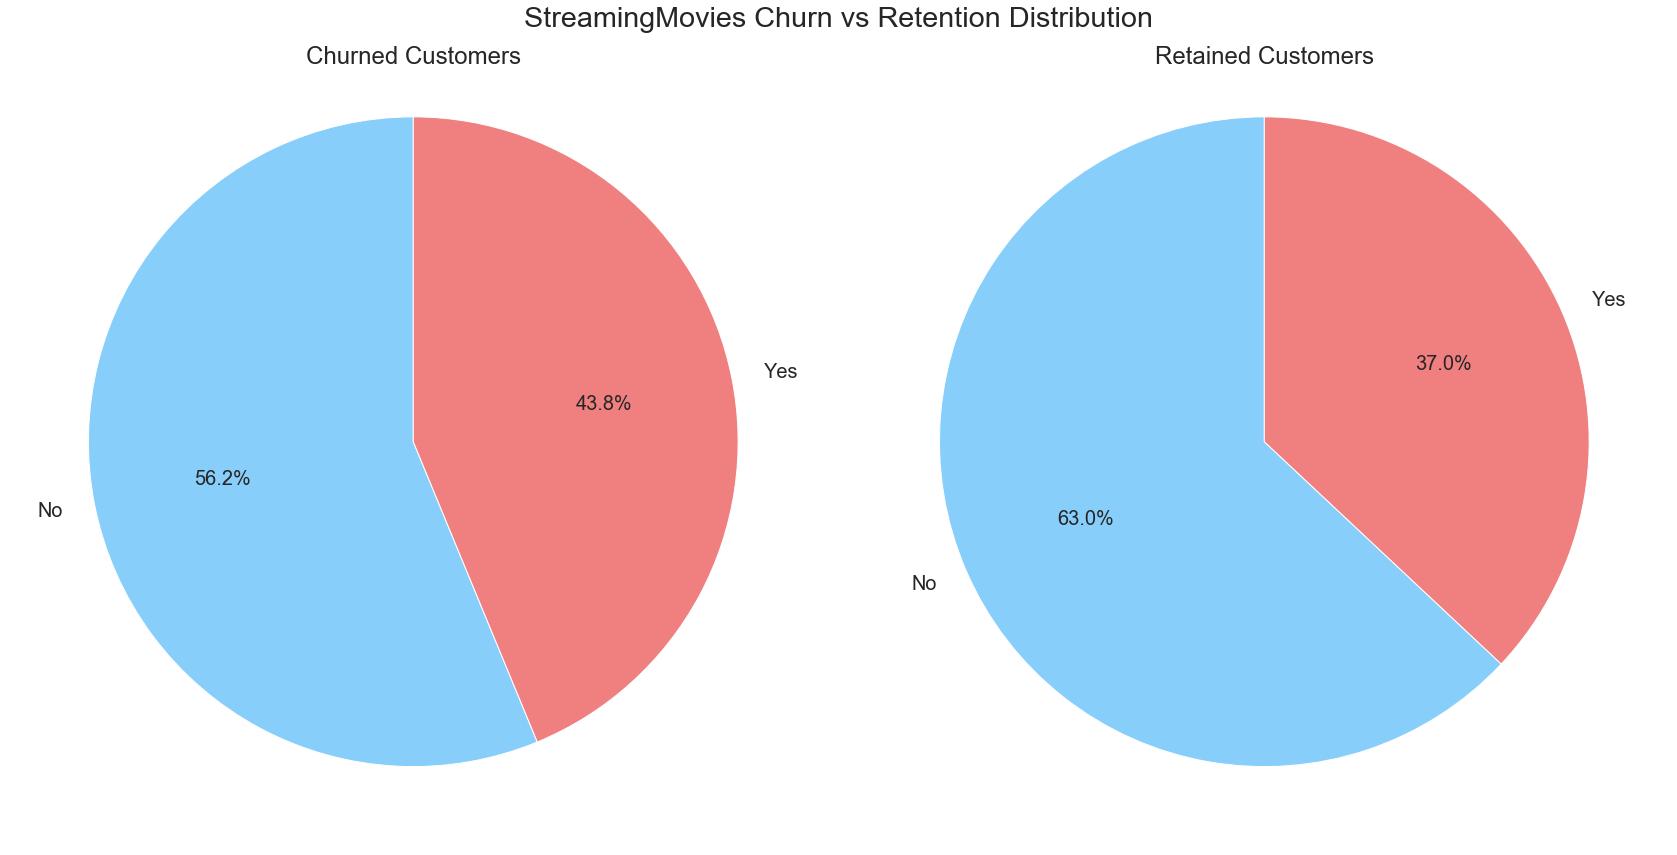

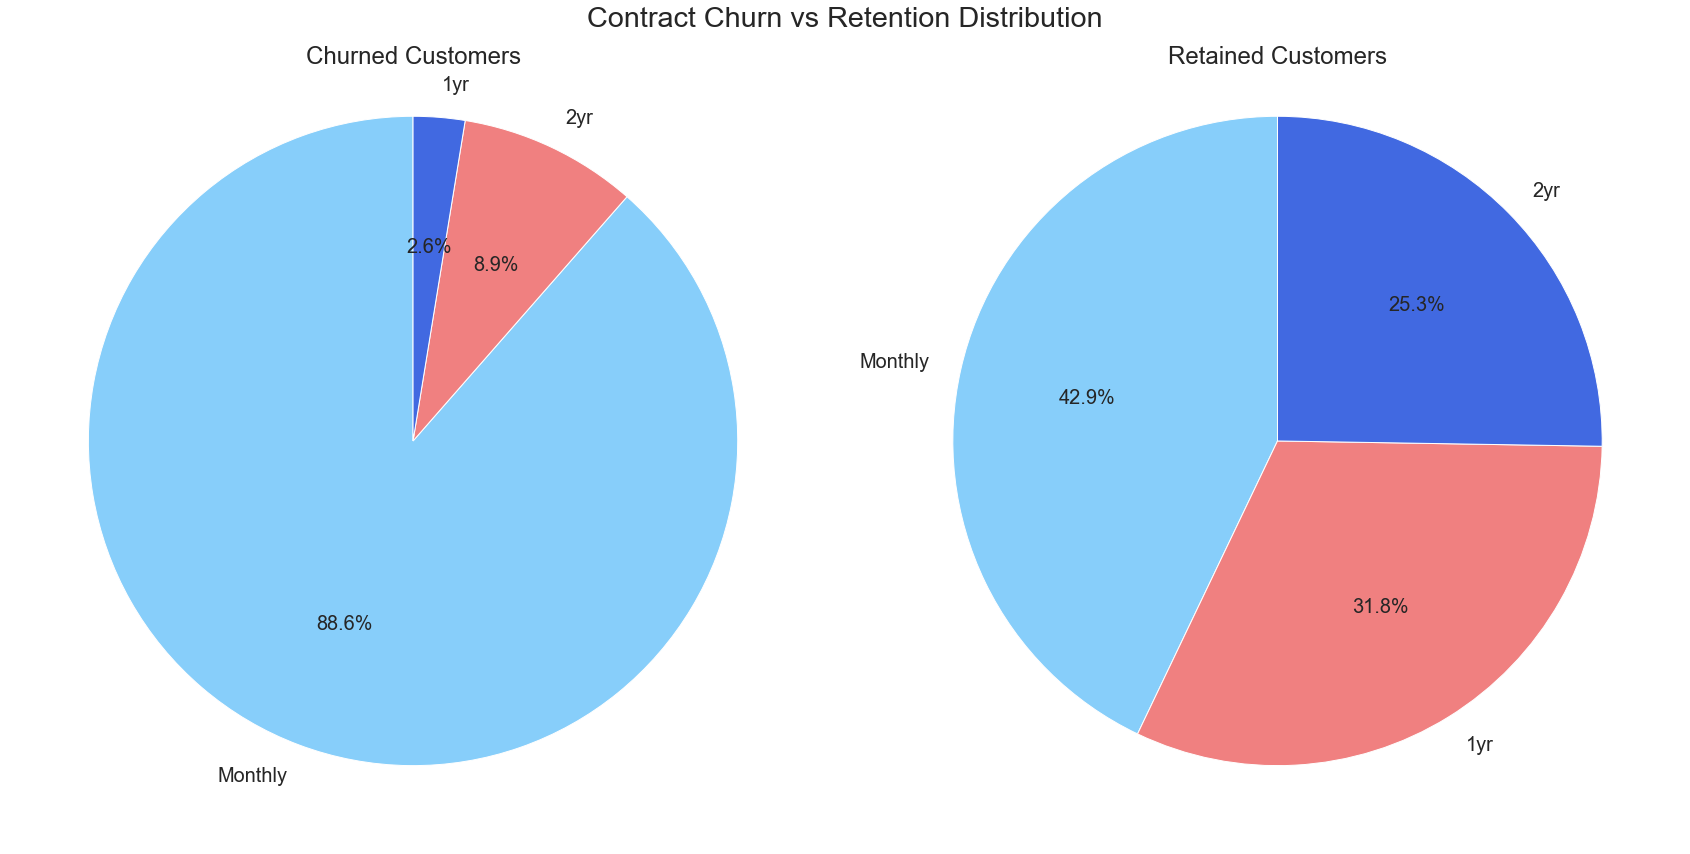

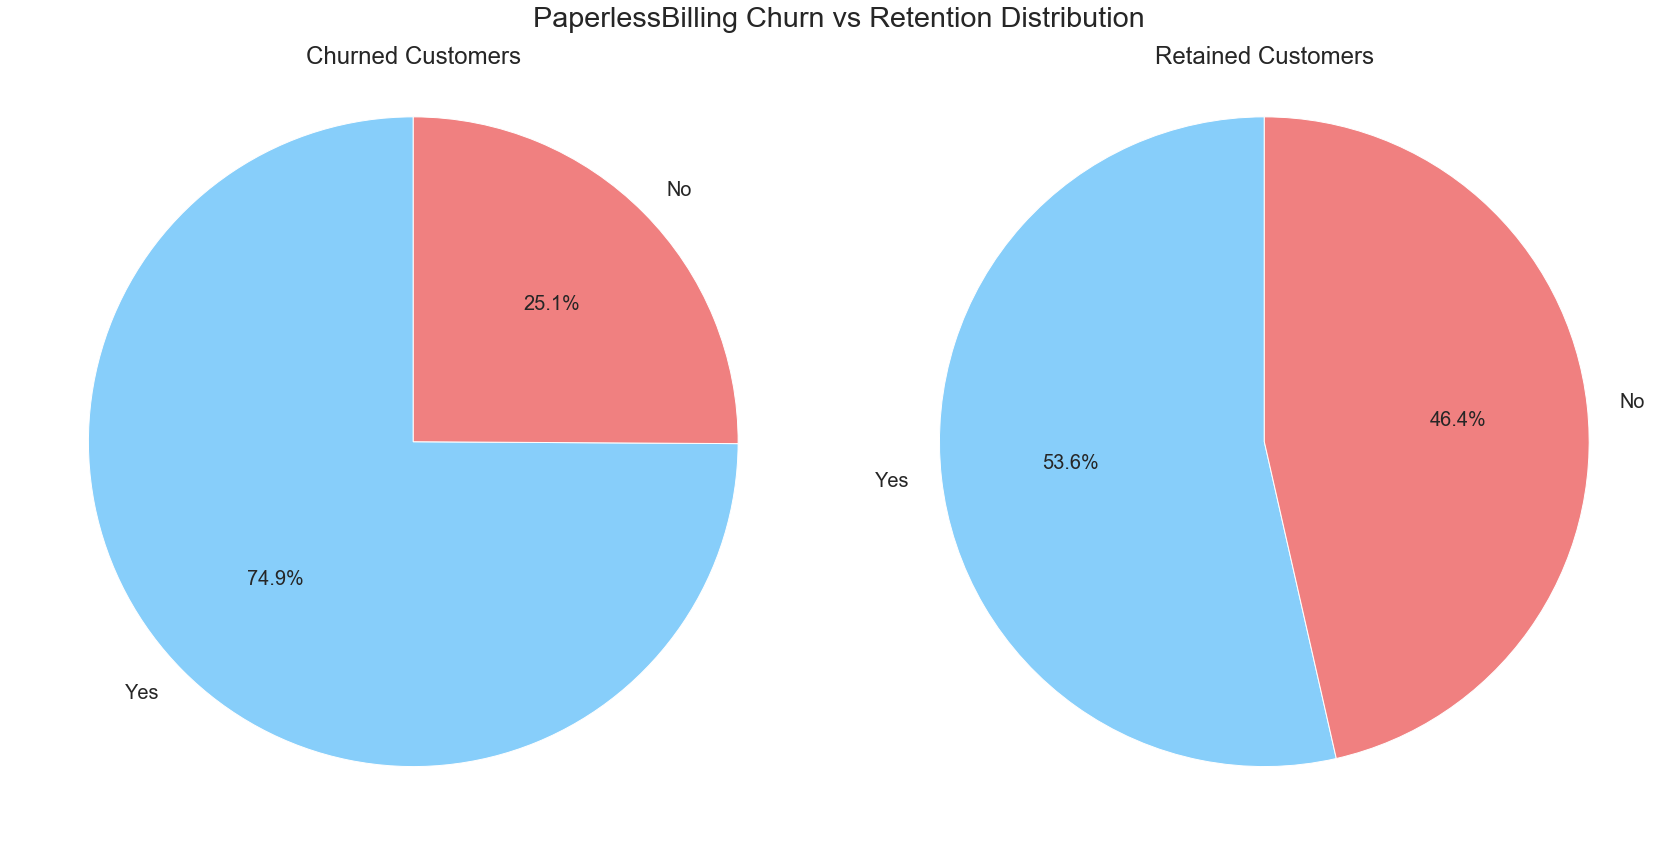

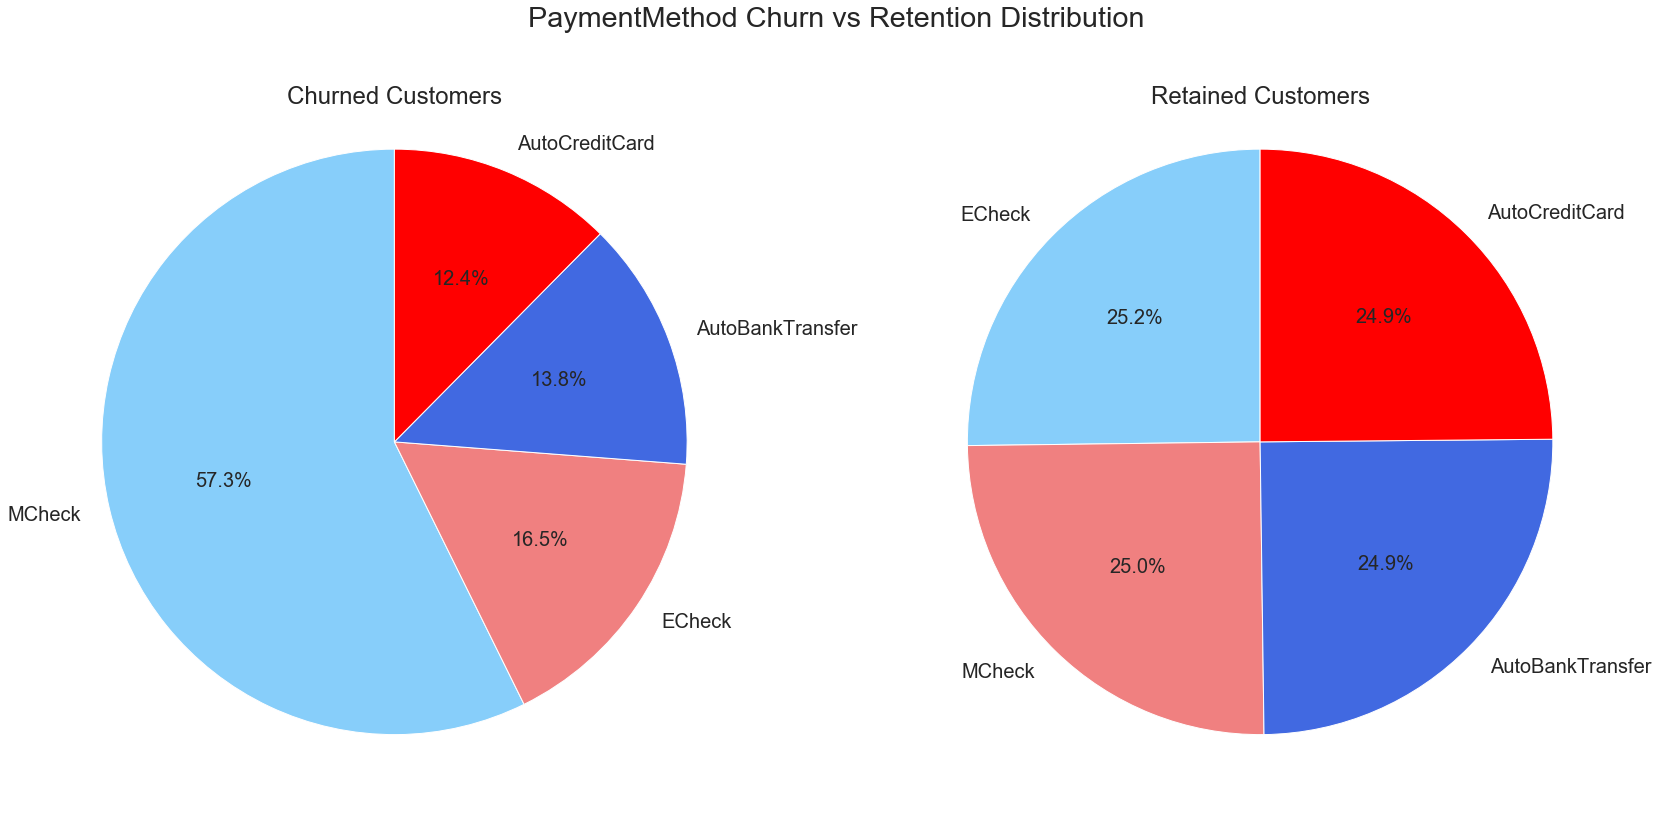

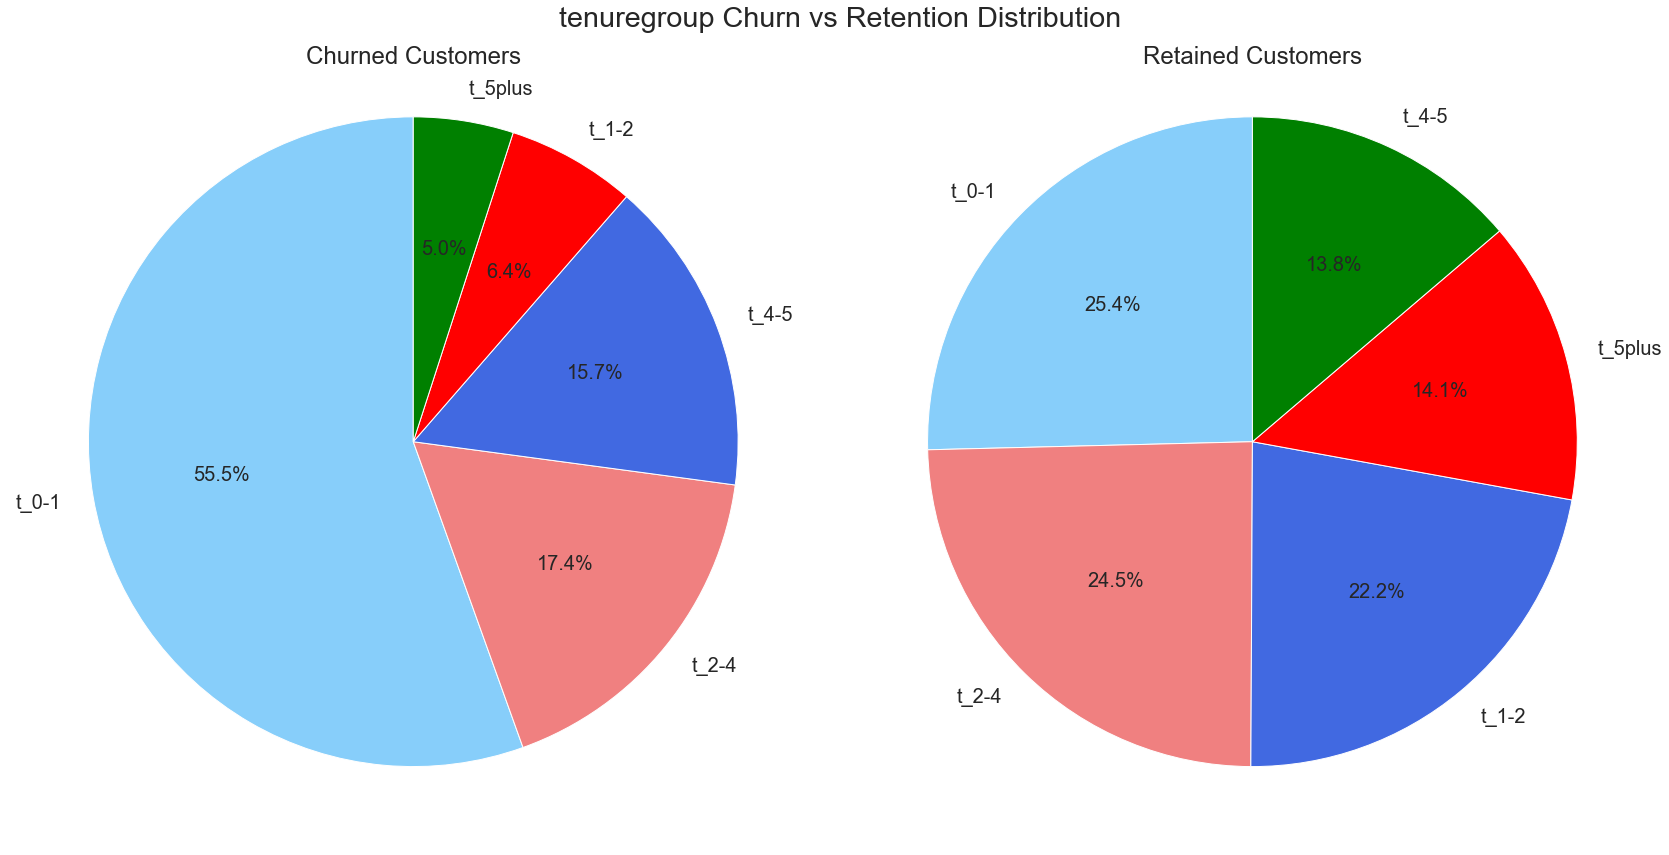

In [31]:
for col in cat_columns:
    category_plots(col)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


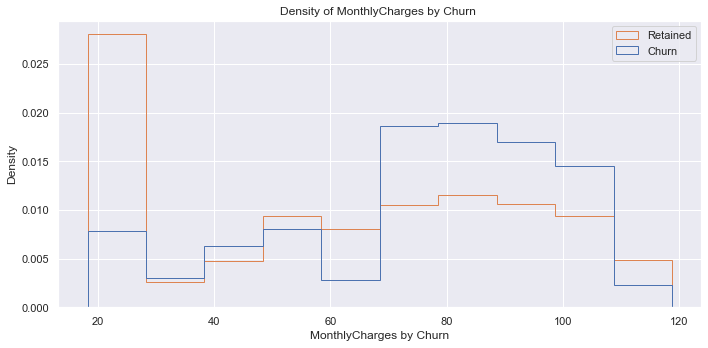

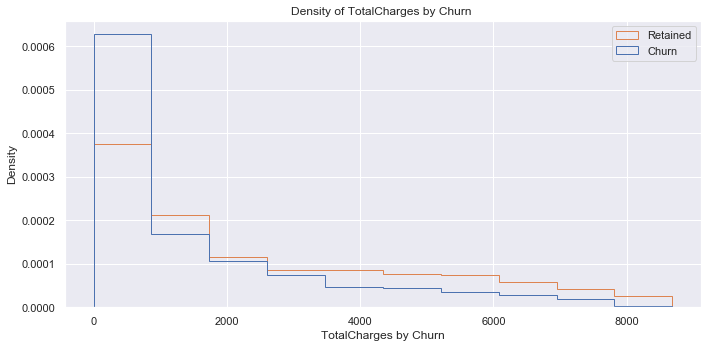

In [32]:
sns.set(font_scale=1)
def continuous_plots(colname):
    churn = churn_customers[colname]
    nochurn = nochurn_customers[colname]

    #Stack the data
    plt.figure(figsize=(10,5))
    plt.hist([churn,nochurn], bins = 10, stacked=False, density=True, label=["Churn","Retained"], histtype="step")
 
    plt.title(f"Density of {colname} by Churn ", {'verticalalignment': 'baseline', 'horizontalalignment': "center"})
    plt.xlabel(f"{colname} by Churn")
    plt.ylabel("Density")
    plt.legend(loc='upper right')
    plt.tight_layout()
    
    plt.show()
    
for col in num_columns:
    continuous_plots(col)

## Bivariate Summary Statistics & Visualizations

In [33]:
# Create a Scatter Matrix
scatter_matrix_df = telecom[["MonthlyCharges","TotalCharges", "Churn", "tenuregroup"]]
scatter_matrix_df

MonthlyCharges  TotalCharges Churn tenuregroup
0              29.85     29.850000    No       t_0-1
1              56.95   1889.500000    No       t_2-4
2              53.85    108.150002   Yes       t_0-1
3              42.30   1840.750000    No       t_2-4
4              70.70    151.649994   Yes       t_0-1
...              ...           ...   ...         ...
7038           84.80   1990.500000    No       t_1-2
7039          103.20   7362.899902    No     t_5plus
7040           29.60    346.450012    No       t_0-1
7041           74.40    306.600006   Yes       t_0-1
7042          105.65   6844.500000    No     t_5plus

[7043 rows x 4 columns]

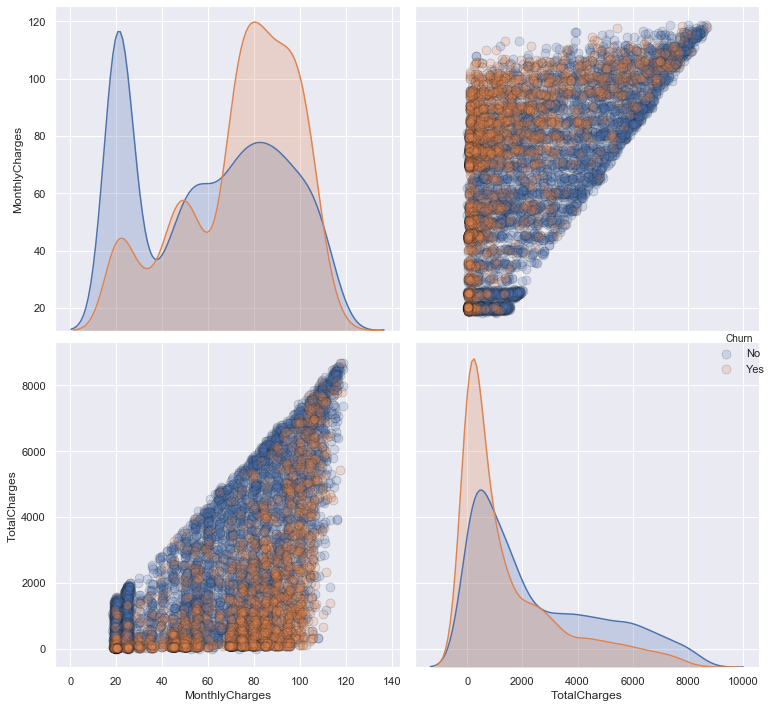

In [34]:
sns.pairplot(scatter_matrix_df, hue = "Churn", diag_kind = "kde",
             plot_kws = {"alpha": 0.2, "s": 80, "edgecolor": "k"},
             height = 5)

plt.tight_layout()

## Obs: There is a strong relationship between:
##       1. MonthlyCharges and TotalCharges
##       2. tenure and TotalCharges
##      The KDEs suggest the density by Churn for each of the continuous variables, which confirms above plots

In [35]:
# Statistics by tenuregroup
churned_tenuregroup = churn_customers.tenuregroup.value_counts().reset_index()
churned_tenuregroup.columns = ["churn_tenuregroup", "frequency"]
#churned_tenuregroup["pct"] = churned_tenuregroup["frequency"]/(churned_tenuregroup["frequency"].sum())*100

churned_tenuregroup

churn_tenuregroup  frequency
0             t_0-1       1037
1             t_2-4        325
2             t_1-2        294
3             t_4-5        120
4           t_5plus         93

In [36]:
retained_tenuregroup = nochurn_customers.tenuregroup.value_counts().reset_index()
retained_tenuregroup.columns = ["retain_tenuregroup", "frequency"]
#retained_tenuregroup["pct"] = retained_tenuregroup["frequency"]/(retained_tenuregroup["frequency"].sum())*100
retained_tenuregroup

retain_tenuregroup  frequency
0            t_5plus       1314
1              t_2-4       1269
2              t_0-1       1149
3              t_1-2        730
4              t_4-5        712

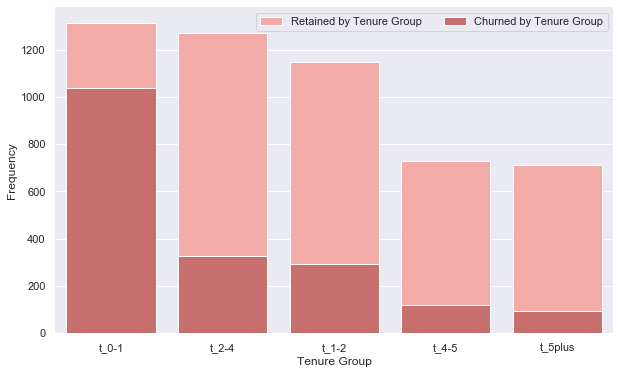

In [37]:
## Plot Churn by Tenure Group

fig, ax1 = plt.subplots(figsize = (10,6))
sns.set_color_codes('pastel')
sns.barplot(x = 'retain_tenuregroup', y = 'frequency', data = retained_tenuregroup,
            label = 'Retained by Tenure Group', color = 'r', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'churn_tenuregroup', y = 'frequency', data = churned_tenuregroup,
            label = 'Churned by Tenure Group', color = 'r', edgecolor = 'w')
ax1.legend(ncol = 2, loc = 'upper right')
plt.xlabel("Tenure Group")
plt.ylabel("Frequency")
sns.despine(left = True, bottom = True)
plt.show()

## Obs: The newest customers have the Highest Churn by frequency.

In [38]:
telecom.corr()

MonthlyCharges  TotalCharges
MonthlyCharges        1.000000      0.651174
TotalCharges          0.651174      1.000000

In [40]:
telecom_corr = telecom.corr(method="pearson")

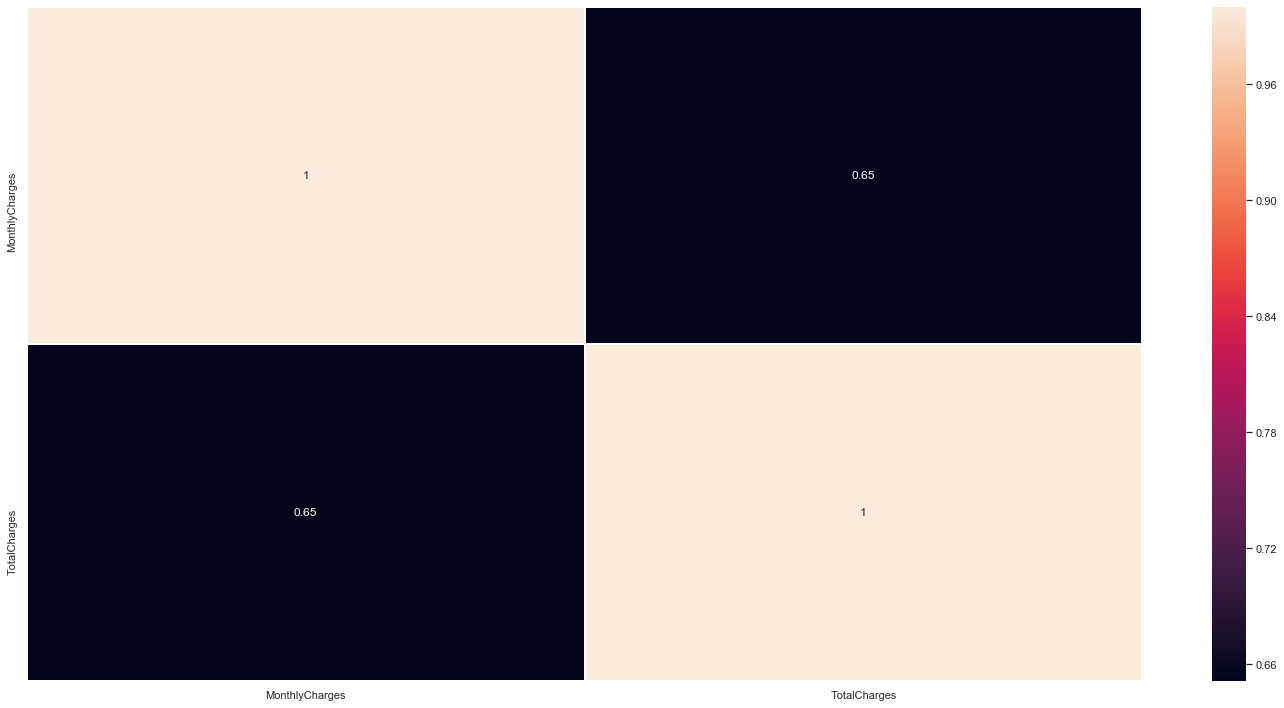

In [42]:
corr_features = telecom.columns.tolist()
corr_array = np.array(telecom_corr)

#Plot Heatmap with annotations using seaborn

sns.set()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(telecom_corr, annot=True, linewidth=1, ax=ax)
plt.tight_layout()

In [44]:
## Obs: Confirms the observations made in Scatter Plot matrix for continuous features

## Data Pre-processing for further analysis

##### Since the continuous variables have a wide range and different units of measure, it needs to be transformed to a similar Scale for better comparison
##### Can choose between StandardScaler or MinMaxScaler, 
#####       - Outliers have more impact on StandardScaler than MinMaxScaler, but since there are no outliers in the continuous variables Std. Scaler                     is used
##### But Logistic regression fits a model that use a weighted sum of input variables are affected by difference in scale
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

#### 1.1. Perform Label Encoding for binary categorical features
#### 1.2. Perform One Hot Encoding for non-binary categorical features
#### 1.3. Perform Data Standardization by Scaling continuous features

In [45]:
telecom.head()

gender SeniorCitizen Partner Dependents PhoneService MultipleLines  \
0  Female             0     Yes         No           No            No   
1    Male             0      No         No          Yes            No   
2    Male             0      No         No          Yes            No   
3    Male             0      No         No           No            No   
4  Female             0      No         No          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4      FiberOptic             No           No               No          No   

  StreamingTV StreamingMovies Contract PaperlessBilling     PaymentMethod  \
0          No              No  Monthly              Yes            ECheck   
1          No              No      1yr               No            MCheck   
2          No              No  Monthly              Yes            MCheck   
3          No              No      1yr               No  AutoBankTransfer   
4          No              No  Monthly              Yes            ECheck   

   MonthlyCharges  TotalCharges Churn tenuregroup  
0           29.85     29.850000    No       t_0-1  
1           56.95   1889.500000    No       t_2-4  
2           53.85    108.150002   Yes       t_0-1  
3           42.30   1840.750000    No       t_2-4  
4           70.70    151.649994   Yes       t_0-1

In [46]:
original_telecom = telecom.copy(deep=True) # Save original dataframe for future references

In [47]:
# List Label and One Hot Encoding features

le_columns = [] # features with exactly 2 values 
oh_columns = [] # features with more than 2 values and non-ordinal values
id_col = ["customerID"]
target_col = ["Churn"]

le_columns = telecom.nunique()[telecom.nunique()==2].keys().tolist()
oh_columns = [x for x in cat_columns if x not in le_columns]

In [48]:
# Confirm feature levels for the features
telecom[le_columns].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       2
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
PaperlessBilling    2
Churn               2
dtype: int64

In [49]:
telecom[oh_columns].nunique()

InternetService    3
Contract           3
PaymentMethod      4
tenuregroup        5
dtype: int64

### Perform Transformations to important features

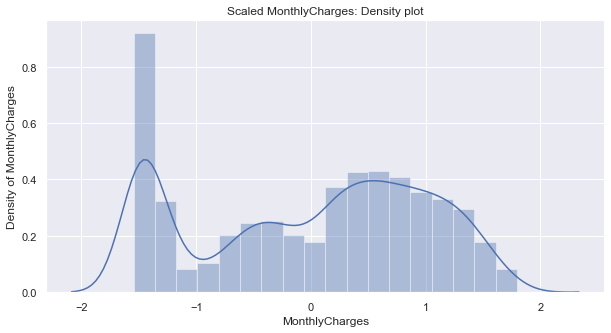

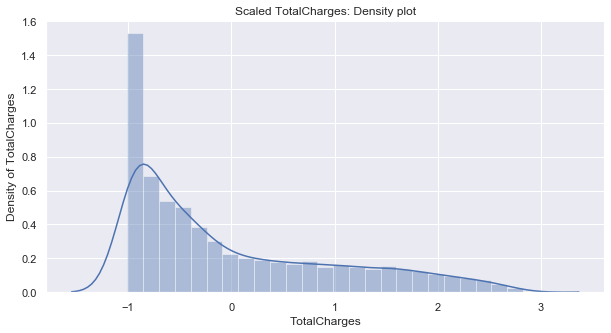

In [50]:
# Perform transformations

le_encode = LabelEncoder()

for l in le_columns:
    telecom[l] = le_encode.fit_transform(telecom[l])
    
#get_dummies for one hot encoding

telecom = pd.get_dummies(data = telecom, columns = oh_columns)

#Scaling Numerical Columns
std = StandardScaler()
scaled = std.fit_transform(telecom[num_columns])
scaled = pd.DataFrame(scaled, columns = num_columns)

for col in scaled.columns:
    plt.figure(figsize=(10,5))    
    plt.tight_layout()
    sns.distplot(scaled[col], kde=True, hist=True).set_title(f"Scaled {col}: Density plot")
    plt.ylabel(f"Density of {col}")

## Obs: The density distribution for the scaled dataset is similar to the original continuous features
## Running this cell again will result in errors, since the telecom df is already transformed

In [51]:
# Compare original and transformed dataset for an example observation
telecom.iloc[:1,:]

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       0              0        1           0             0              0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            0            0   

   StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0                0                 1           29.85         29.85      0   

   InternetService_DSL  InternetService_FiberOptic  InternetService_No  \
0                    1                           0                   0   

   Contract_1yr  Contract_2yr  Contract_Monthly  \
0             0             0                 1   

   PaymentMethod_AutoBankTransfer  PaymentMethod_AutoCreditCard  \
0                               0                             0   

   PaymentMethod_ECheck  PaymentMethod_MCheck  tenuregroup_t_0-1  \
0                     1                     0                  1   

   tenuregroup_t_1-2  tenuregroup_t_2-4  tenuregroup_t_4-5  \
0                  0                  0                  0   

   tenuregroup_t_5plus  
0                    0

In [52]:
original_telecom.iloc[:1,:]

gender SeniorCitizen Partner Dependents PhoneService MultipleLines  \
0  Female             0     Yes         No           No            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   

  StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod  \
0          No              No  Monthly              Yes        ECheck   

   MonthlyCharges  TotalCharges Churn tenuregroup  
0           29.85         29.85    No       t_0-1

In [53]:
# Merge scaled transformed continuous features to the telecom data set & drop original continuous features
#1. Drop old features
telecom = telecom.drop(columns=num_columns, axis=1) 
#2. Add scaled features
telecom = telecom.merge(scaled, left_index=True, right_index=True, how="left")

telecom.head()

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       0              0        1           0             0              0   
1       1              0        0           0             1              0   
2       1              0        0           0             1              0   
3       1              0        0           0             0              0   
4       0              0        0           0             1              0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            0            0   
1               1             0                 1            0            0   
2               1             1                 0            0            0   
3               1             0                 1            1            0   
4               0             0                 0            0            0   

   StreamingMovies  PaperlessBilling  Churn  InternetService_DSL  \
0                0                 1      0                    1   
1                0                 0      0                    1   
2                0                 1      1                    1   
3                0                 0      0                    1   
4                0                 1      1                    0   

   InternetService_FiberOptic  InternetService_No  Contract_1yr  Contract_2yr  \
0                           0                   0             0             0   
1                           0                   0             1             0   
2                           0                   0             0             0   
3                           0                   0             1             0   
4                           1                   0             0             0   

   Contract_Monthly  PaymentMethod_AutoBankTransfer  \
0                 1                               0   
1                 0                               0   
2                 1                               0   
3                 0                               1   
4                 1                               0   

   PaymentMethod_AutoCreditCard  PaymentMethod_ECheck  PaymentMethod_MCheck  \
0                             0                     1                     0   
1                             0                     0                     1   
2                             0                     0                     1   
3                             0                     0                     0   
4                             0                     1                     0   

   tenuregroup_t_0-1  tenuregroup_t_1-2  tenuregroup_t_2-4  tenuregroup_t_4-5  \
0                  1                  0                  0                  0   
1                  0                  0                  1                  0   
2                  1                  0                  0                  0   
3                  0                  0                  1                  0   
4                  1                  0                  0                  0   

   tenuregroup_t_5plus  MonthlyCharges  TotalCharges  
0                    0       -1.160323     -0.992611  
1                    0       -0.259629     -0.172165  
2                    0       -0.362660     -0.958066  
3                    0       -0.746535     -0.193672  
4                    0        0.197365     -0.938874

In [54]:
# Saved the Cleaned, Untransformed data set
file_path = "../data/processed/Telco_Customer_Churn_cleaned.xlsx"

writer = pd.ExcelWriter(file_path, engine = 'xlsxwriter')
original_telecom.to_excel(writer, index = False,sheet_name='Telco_cleaned_NoTransform')
telecom.to_excel(writer, index = False,sheet_name='Telco_TransformedData')
writer.save()
writer.close()

### Create a correlation matrix for transformed data

In [55]:
telecom_corr = telecom.corr(method="pearson")

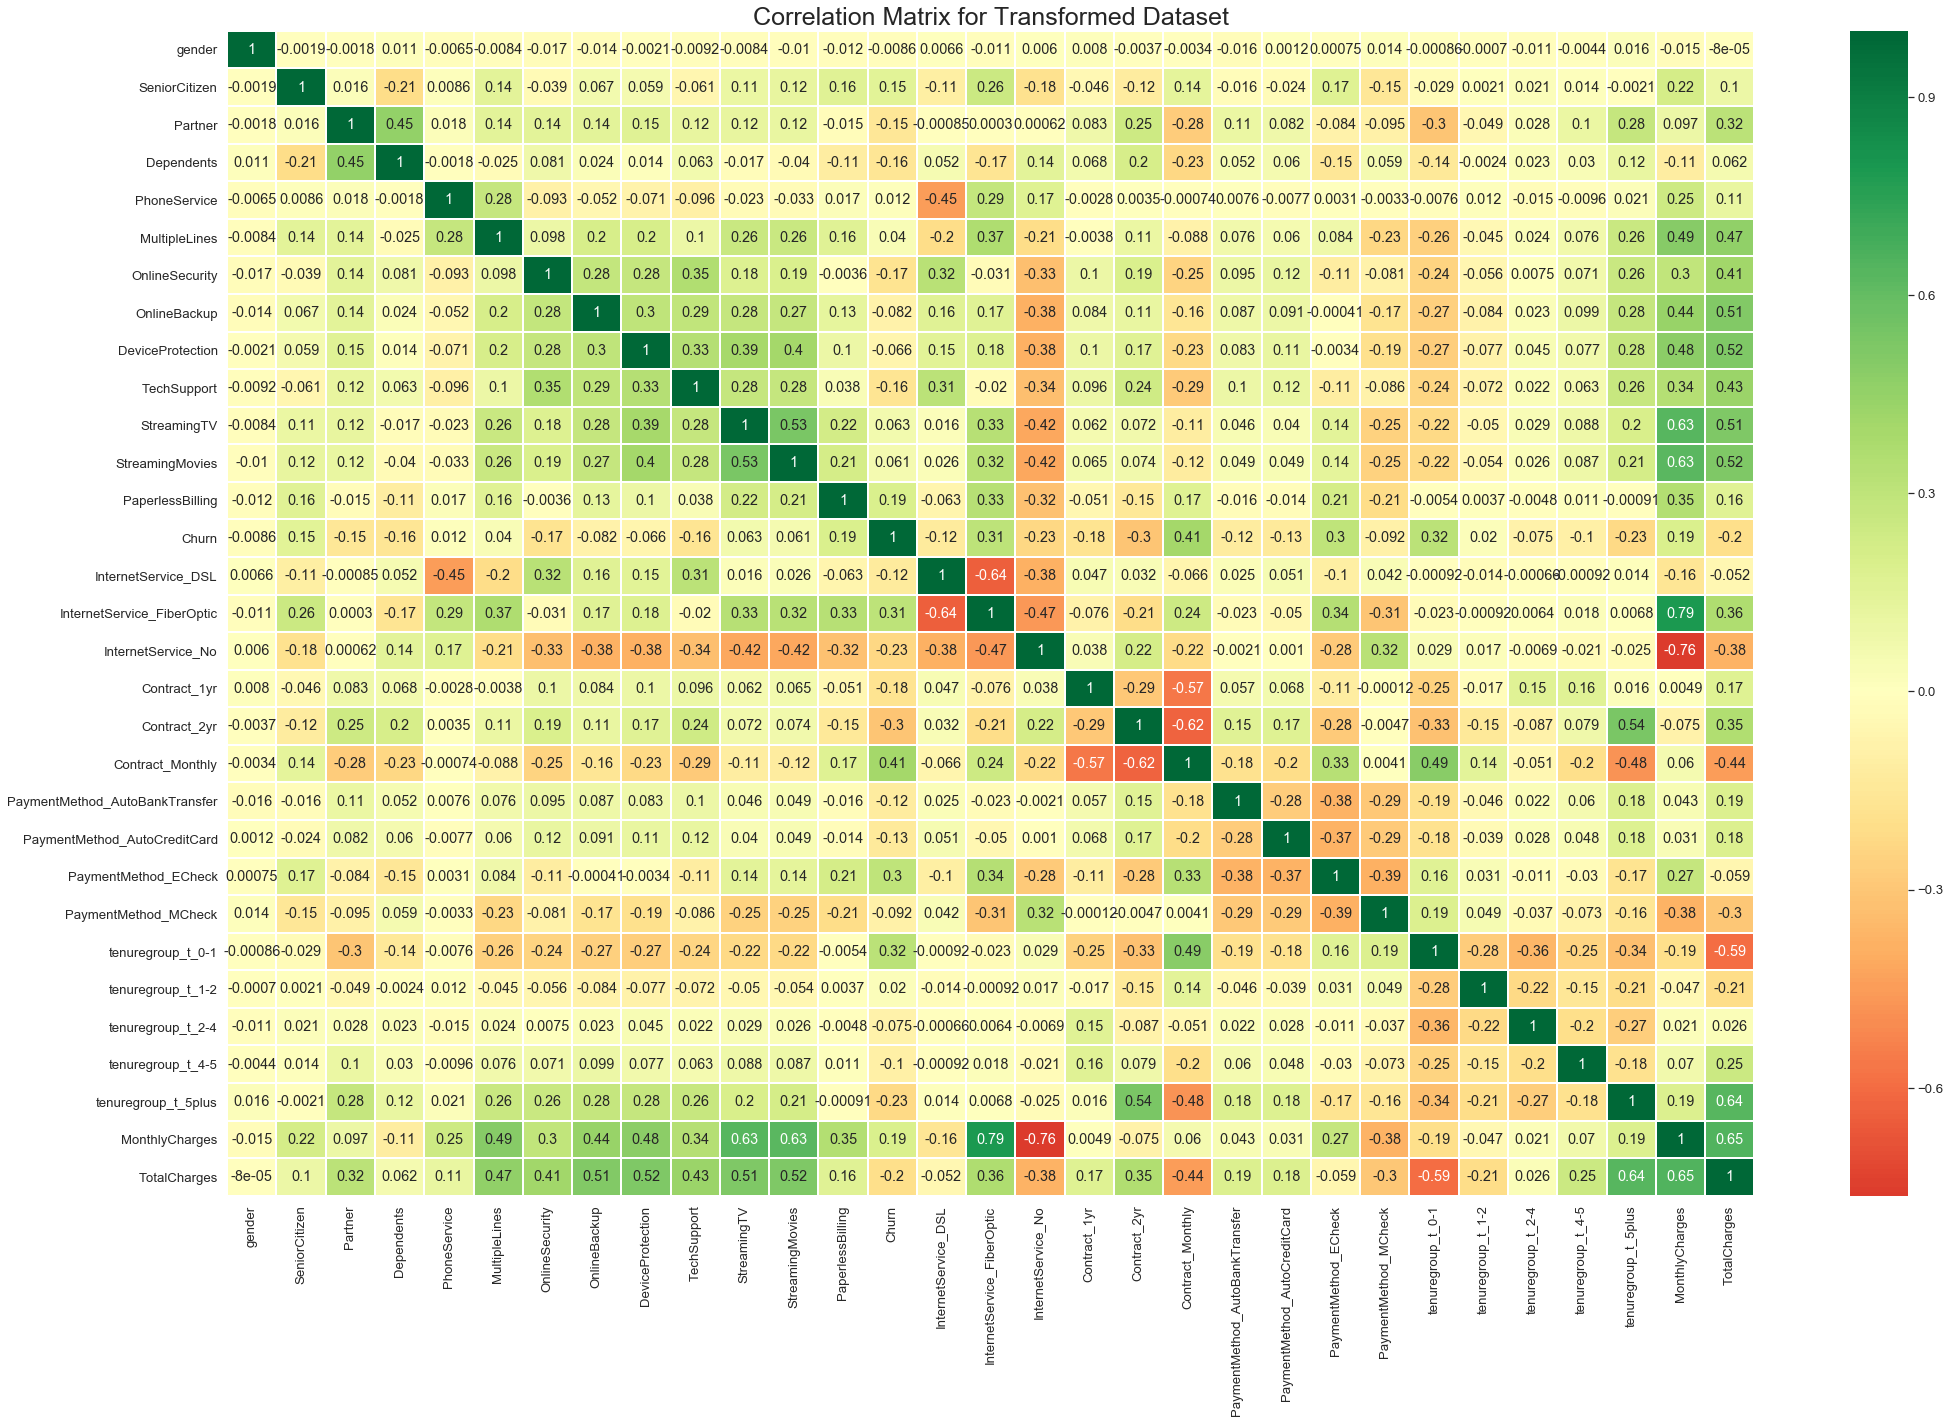

In [56]:
#Plot Heatmap with annotations using seaborn

sns.set(font_scale=1.2)
plt.figure(figsize=(30,20))
sns.heatmap(telecom_corr, annot=True, linewidth=1, center=0, cmap="RdYlGn")
plt.title("Correlation Matrix for Transformed Dataset", fontsize=25)
plt.tight_layout()


# Create Models using Sci-kit Learn for Advanced Analysis & Prediction

## Splitting Data into "Training" and "Test" sub-sets for Model Performance Assessments
### 1. Train-Test Split

In [57]:
# Prepare data for split
telecom_y = []
telecom_y = telecom["Churn"].ravel()
telecom_x = telecom.copy(deep=True)
telecom_x = telecom.drop(columns = ["Churn"], axis=1) # Customer ID is not relevant for current analysis

# Split Data
X_train, X_test, y_train, y_test = train_test_split(telecom_x, telecom_y, test_size= 0.25, random_state=0, shuffle=True)

del telecom_y, telecom_x # release memory since these dfs are no longer required

In [58]:
np.nanmean(y_train), np.nanmean(y_test)

#Similar means = the split is not imbalanced

(0.26618705035971224, 0.2629187961385576)

In [59]:
# Define required functions for repeated executions

#1. Get Model Scores

def model_scores(model_name, model, Xtest, ytest, predictions,idx):
    model_acc = model.score(Xtest, ytest)
    model_recall = recall_score(ytest,np.array(predictions))
    model_precision = precision_score(ytest,np.array(predictions))
    model_auc = roc_auc_score(ytest,np.array(predictions))
    model_f1 = f1_score(ytest, np.array(predictions))
    model_classreport = classification_report(ytest, np.array(predictions))
    model_cm = confusion_matrix(ytest, np.array(predictions))
    
    print("\033[1m Classification Report: \033[0;0m\n", model_classreport)
    print("\033[1m Accuracy Score: \033[0;0m\n", model_acc)    
    print(f"\033[1m Precision: \033[0;0m{model_precision}\033[1m  & Recall Scores: \033[0;0m{model_recall}\n")
    print("\033[1m F1 Score: \033[0;0m\n", model_f1)
    print("\033[1m AUC: \033[0;0m\n", model_auc)
    
    comp_cols = ["ModelName", "AccuracyScore", "RecallScore", "PrecisionScore", "F1Score", "AreaUnderCurve" ]
        
    df = []
    df = (pd.DataFrame({"ModelName": model_name, 
                        "AccuracyScore":model_acc,
                        "RecallScore": model_recall,
                        "PrecisionScore": model_precision,
                        "F1Score": model_f1,
                        "AreaUnderCurve": model_auc
                        }, 
                       index=[idx])
         )
        
    plot_confusionmatrix(model_name, model_cm)
    
    fpr, tpr, thresholds = roc_curve(ytest, model.predict_proba(Xtest)[:,1])
    plot_roc_auc(model_name, model_auc, fpr, tpr)
    
    return df
    
    
#2. Plot Confusion Matrix for the models
def plot_confusionmatrix(algorithm, conf_matrix):
    classes = ["Retained Customers", "Churn Customers"]
    plt.figure(figsize=(7,7))
    plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(f"{algorithm}: Confusion Matrix")
    plt. colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)
    fmt = "d"
    thresh = conf_matrix.max()/2

    #Labeling the plot
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
            plt.text(j, i, format(conf_matrix[i, j], fmt), fontsize = 15,
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    
#3. Plot ROC-AUC Curve
def plot_roc_auc(algorithm, roc_auc, fpr, tpr):
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label="Model (area = %0.2f)" %roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{algorithm} Receiver Operating Characteristic")
    plt.legend(loc="lower right")    
    plt.grid(True)
    plt.show()
    
#4. Plot Precision Recall Curve

def plot_precision_recall(ytest, yscore):
    precision, recall, thresholds = precision_recall_curve(ytest, yscore)
    plt.plot(thresholds, precision[:len(precision)-1], label='Precision', ls = 'dashed') 
    plt.plot(thresholds, recall[:len(recall)-1], label='Recall', ls = 'dashed') 
    plt.legend(loc="best")
    plt.title('Precision and Recall scores by Decision Threshold') 
    plt.xlabel('Threshold')
    plt.ylabel('Metrics value')
    plt.grid(True)

### 1. Create Dummy Baseline Model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1298
           1       0.00      0.00      0.00       463

    accuracy                           0.74      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.74      0.63      1761

 Accuracy Score: 
 0.7370812038614424
 Precision: 0.0  & Recall Scores: 0.0

 F1 Score: 
 0.0
 AUC: 
 0.5


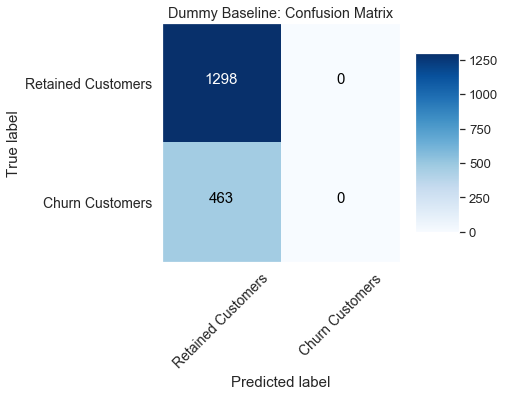

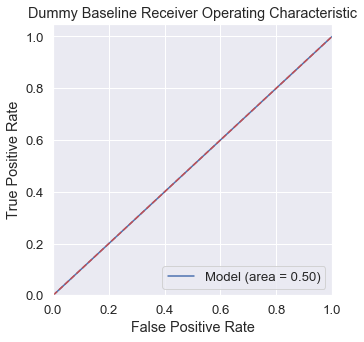

ModelName  AccuracyScore  RecallScore  PrecisionScore  F1Score  \
0  Dummy Baseline       0.737081          0.0             0.0      0.0   

   AreaUnderCurve  
0             0.5

In [63]:
dummy_model = DummyClassifier(strategy="most_frequent", random_state=0)

# Train Dummy Baseline
dummy_model.fit(X_train, y_train)

#Generate Prediction
base_predictions = dummy_model.predict(X_test)

# Display Scores & Confusion Matrix
model_comparison = pd.DataFrame(model_scores("Dummy Baseline", dummy_model, X_test, y_test, base_predictions,0), 
                                columns=["ModelName", 
                                         "AccuracyScore", 
                                         "RecallScore", 
                                         "PrecisionScore", 
                                         "F1Score", 
                                         "AreaUnderCurve" ]
                               )
model_comparison = model_comparison.drop_duplicates() # In case this cell is rerun
model_comparison

### Over Sampling the train sets using SMOTE (Synthetic Minority Oversampling Technique)
###   - Up sample "Churned Customers" in the training dataset

In [64]:
x_cols = X_train.columns.tolist()
y_cols = ["Churn"]

In [65]:
#oversampling minority class using smote

over_sample = SMOTE(random_state = 0)

os_data_X, os_data_y = over_sample.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=x_cols)
os_data_y = pd.DataFrame(data=os_data_y, columns=y_cols)

#Check the details after SMOTE runs
retain_count = len(os_data_y[os_data_y["Churn"]==0])
churn_count = len(os_data_y[os_data_y["Churn"]==1])

print(f"Total count of Oversampled data: {len(os_data_X)}")
print(f"Number of Retained Customer count in Oversample data: {retain_count}")
print(f"Number of Churned Customer count in Oversample data: {churn_count}")
print(f"Proportion of Retained Customer data: {retain_count/len(os_data_X)}")
print(f"Proportion of Churned Customer data: {churn_count/len(os_data_X)}")

Total count of Oversampled data: 7752
Number of Retained Customer count in Oversample data: 3876
Number of Churned Customer count in Oversample data: 3876
Proportion of Retained Customer data: 0.5
Proportion of Churned Customer data: 0.5


In [66]:
## Obs: Imbalanced classes from the target variable has been addressed and these data sets are to be used for further modelling

### Dimension Reduction - Remove features which would not contribute to the model's performance
### Use RFE (Recursive Feature Elimination)
####   - Repeatedly construct a model and choose either the best or worst performing feature

In [67]:
# Create RFE Model
# use x_cols and y_cols from above for column information

log_regr = LogisticRegression(solver="liblinear")

rfe = RFE(log_regr, 15) #Select top 15 features from 31 -> try and reduce the # of features by 50% approx.
rfe.fit(os_data_X, os_data_y.values.ravel())

rfe_ranking = pd.DataFrame( {"Features" : os_data_X.columns.tolist(),
                             "rfe_support": rfe.support_,                             
                             "rfe_ranking": rfe.ranking_})
rfe_ranking.sort_values(by="rfe_ranking", inplace=True)
rfe_ranking

## Obs: Based on the RFE model, we know that out of 31 features, top 15 features are listed below. 
## These can be further reduced based on the p-values for each 

Features  rfe_support  rfe_ranking
25               tenuregroup_t_2-4         True            1
22            PaymentMethod_MCheck         True            1
21            PaymentMethod_ECheck         True            1
20    PaymentMethod_AutoCreditCard         True            1
19  PaymentMethod_AutoBankTransfer         True            1
18                Contract_Monthly         True            1
17                    Contract_2yr         True            1
16                    Contract_1yr         True            1
28                  MonthlyCharges         True            1
24               tenuregroup_t_1-2         True            1
6                   OnlineSecurity         True            1
4                     PhoneService         True            1
26               tenuregroup_t_4-5         True            1
27             tenuregroup_t_5plus         True            1
9                      TechSupport         True            1
7                     OnlineBackup        False            2
11                 StreamingMovies        False            3
14      InternetService_FiberOptic        False            4
15              InternetService_No        False            5
10                     StreamingTV        False            6
8                 DeviceProtection        False            7
23               tenuregroup_t_0-1        False            8
5                    MultipleLines        False            9
3                       Dependents        False           10
13             InternetService_DSL        False           11
0                           gender        False           12
2                          Partner        False           13
12                PaperlessBilling        False           14
1                    SeniorCitizen        False           15
29                    TotalCharges        False           16

In [68]:
# Output top 15 columns from RFE process
rfe_cols = rfe_ranking[rfe_ranking["rfe_support"] == True]["Features"].tolist()

# Build new training dataframes with the above selected columns
X = os_data_X[rfe_cols]
y = os_data_y

### Implementing Stats Model to get the p-values of each of the selected columns

In [69]:
stats_logitmodel = sm.Logit(y, X)
result = stats_logitmodel.fit()
print("Summary: \n",result.summary2())

Optimization terminated successfully.
         Current function value: 0.452454
         Iterations 7
Summary: 
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.347    
Dependent Variable:      Churn                 AIC:                   7044.8536
Date:                    2020-07-27 22:56      BIC:                   7149.1892
No. Observations:        7752                  Log-Likelihood:        -3507.4  
Df Model:                14                    LL-Null:               -5373.3  
Df Residuals:            7737                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------

In [70]:
# Remove columns with p-value more than significance value of 0.05
remove_cols = ["Contract_2yr", "PhoneService"]
final_cols = [i for i in X.columns if i not in remove_cols]

X = os_data_X[final_cols]
y = os_data_y["Churn"]

print(f"Total number of Observations in Oversampled X: {len(X)} & Oversampled y: {len(y)}")

Total number of Observations in Oversampled X: 7752 & Oversampled y: 7752


#### Make sure the p-values are correct for remaining features

In [71]:
stats_logitmodel = sm.Logit(y, X)
result = stats_logitmodel.fit()
print("Summary: \n",result.summary2())

Optimization terminated successfully.
         Current function value: 0.452524
         Iterations 7
Summary: 
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.347    
Dependent Variable:      Churn                 AIC:                   7041.9284
Date:                    2020-07-27 22:57      BIC:                   7132.3526
No. Observations:        7752                  Log-Likelihood:        -3508.0  
Df Model:                12                    LL-Null:               -5373.3  
Df Residuals:            7739                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------

Optimization terminated successfully.
         Current function value: 0.425046
         Iterations 8


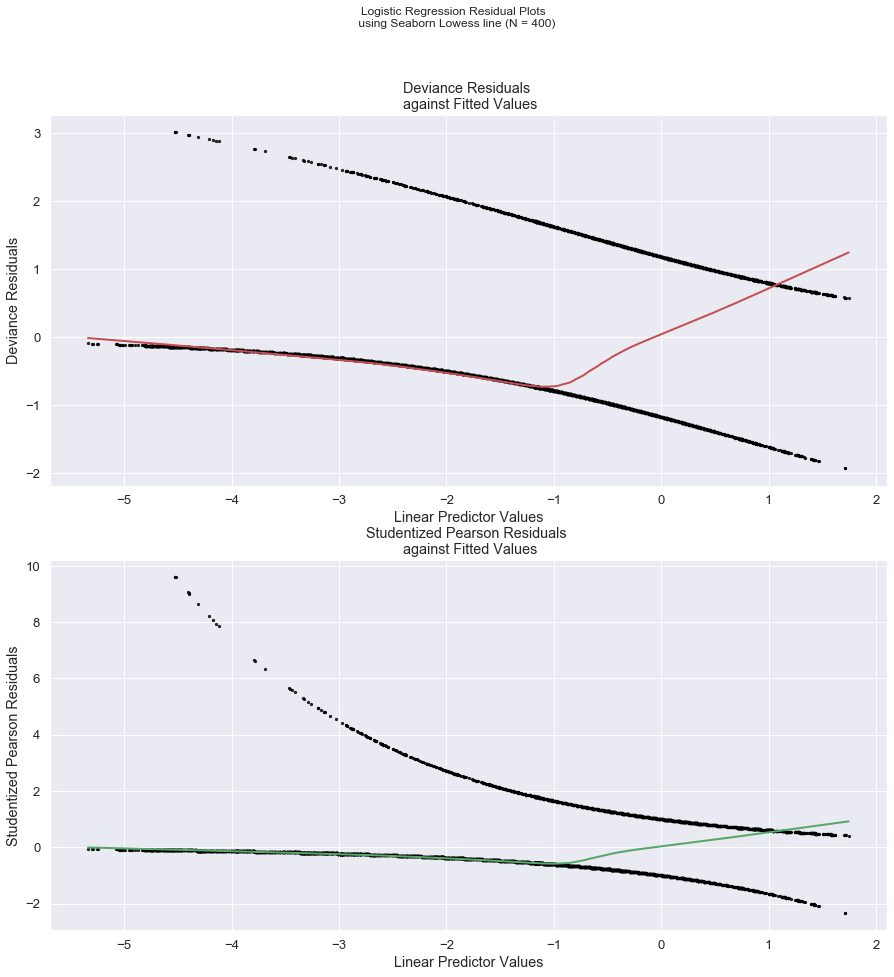

In [167]:
# Check Logistic Regression Assumptions for Logistic Regression Residuals
tel = telecom.copy(deep=True)
tel = tel.rename(columns={"tenuregroup_t_2-4":"tg24", 
                          "tenuregroup_t_1-2":"tg12", 
                          "tenuregroup_t_4-5":"tg45",
                          "tenuregroup_t_0-1":"tg01",
                          "tenuregroup_t_5plus":"tg5"})
tel.head(1)
model = smf.logit("Churn~MonthlyCharges+tg24+PaymentMethod_MCheck+PaymentMethod_ECheck+PaymentMethod_AutoCreditCard+PaymentMethod_AutoBankTransfer+Contract_Monthly+Contract_1yr+tg12+OnlineSecurity+tg45+tg5+TechSupport", data = tel).fit()

## Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 400)")

# Deviance Residuals
sns.regplot(model.fittedvalues, model.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"r", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

#Pearson Residuals
sns.regplot(model.fittedvalues, model.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Pearson Residuals")

plt.show()

# Build Logistic Regression Model with Default Parameters

 Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       984
           1       0.79      0.81      0.80       954

    accuracy                           0.80      1938
   macro avg       0.80      0.80      0.80      1938
weighted avg       0.80      0.80      0.80      1938

 Accuracy Score: 
 0.7977296181630547
 Precision: 0.7885010266940452  & Recall Scores: 0.8050314465408805

 F1 Score: 
 0.7966804979253113
 AUC: 
 0.7978409265224727


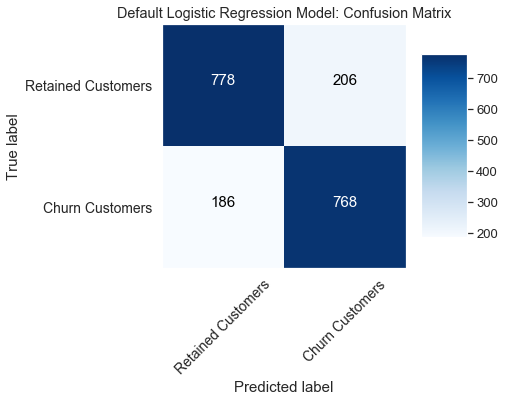

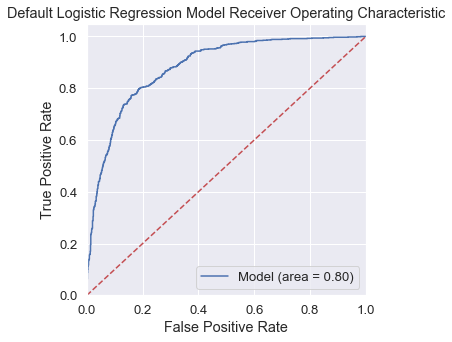

ModelName  AccuracyScore  RecallScore  \
0                     Dummy Baseline       0.737081     0.000000   
1  Default Logistic Regression Model       0.797730     0.805031   

   PrecisionScore  F1Score  AreaUnderCurve  
0        0.000000  0.00000        0.500000  
1        0.788501  0.79668        0.797841

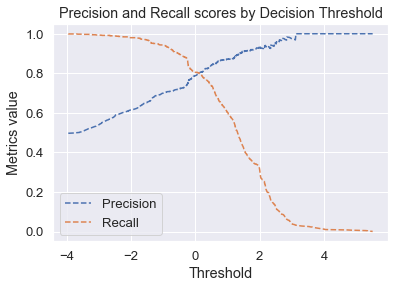

In [73]:
# Split the oversampled "balanced" training data set again, since the old training data was imbalanced.
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size= 0.25, random_state=0)

# Create Logistic Regression model with Default parameters
lr_model = LogisticRegression(solver="liblinear")

# Train the model
lr_model.fit(X_train, y_train)

# Predict the results from testing set & calculate model performance
lr_predictions = lr_model.predict(X_test)

#model_comparison = model_comparison.drop(index=0, axis=0)
model_comparison = model_comparison.append(model_scores(model_name = "Default Logistic Regression Model", 
                                                        model = lr_model, 
                                                        Xtest = X_test,
                                                        ytest = y_test, 
                                                        predictions = lr_predictions, 
                                                        idx=1),
                                           ignore_index=False)

model_comparison = model_comparison.drop_duplicates() #Incase this cell is run again. 

y_score = lr_model.decision_function(X_test)
plot_precision_recall(y_test, y_score)

model_comparison

### Hyperparameter tuning for Logistic Regression Model

In [75]:
# Get a list of all Metrics Scorers that can be used to tune hyperparameters
# Since the focus is on recall scores, more than precision setting the scoring to "recall"
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [110]:
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.65, 0:0.3}, {1:0.7, 0:0.3}]
parameters = {"C": [0.001, 0.001,0.1, 1, 10, 100, 1000],
              "penalty": ["l1", "l2"], 
              "class_weight": class_weight, 
              "solver" : ['liblinear', 'saga']}

cv_model = GridSearchCV(lr_model, 
                        param_grid = parameters, 
                        cv = 3, 
                        scoring="f1",
                        verbose=1, 
                        n_jobs=-1) # perform 3 fold validation

cv_result = cv_model.fit(X_train, y_train)

print(f"Best Parameters: {cv_model.best_params_} \n")
print(f"Best Score after HPO: {cv_model.best_score_} \n")
print(f"Best Model Accuracy Score after Hyperparameter Optimization: {cv_model.score(X_test, y_test)}")

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.3s


Best Parameters: {'C': 1, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l1', 'solver': 'saga'} 

Best Score after HPO: 0.8092044382140862 

Best Model Accuracy Score after Hyperparameter Optimization: 0.7999999999999999


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    7.2s finished


 Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.68      0.76       984
           1       0.73      0.89      0.80       954

    accuracy                           0.78      1938
   macro avg       0.79      0.78      0.78      1938
weighted avg       0.80      0.78      0.78      1938

 Accuracy Score: 
 0.7999999999999999
 Precision: 0.7272727272727273  & Recall Scores: 0.8888888888888888

 F1 Score: 
 0.7999999999999999
 AUC: 
 0.7828590785907859


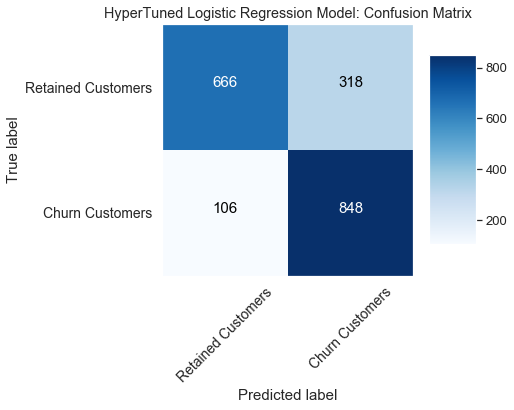

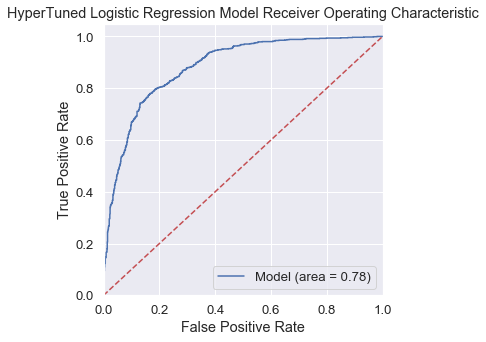

ModelName  AccuracyScore  RecallScore  \
3           Default Random Forest Model       0.835913     0.863732   
4              HyperTuned Random Forest       0.818885     0.861635   
4              HyperTuned Random Forest       0.816821     0.857442   
2  HyperTuned Logistic Regression Model       0.800000     0.888889   
1     Default Logistic Regression Model       0.797730     0.805031   
2  HyperTuned Logistic Regression Model       0.933962     0.933962   
0                        Dummy Baseline       0.737081     0.000000   

   PrecisionScore   F1Score  AreaUnderCurve  
3        0.814229  0.838250        0.836337  
4        0.789625  0.824060        0.819537  
4        0.788814  0.821698        0.817441  
2        0.727273  0.800000        0.782859  
1        0.788501  0.796680        0.797841  
2        0.691770  0.794826        0.765253  
0        0.000000  0.000000        0.500000

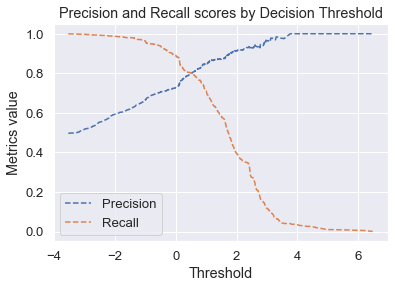

In [122]:
cv_predictions = cv_model.predict(X_test)
model_comparison = model_comparison.append(model_scores(model_name="HyperTuned Logistic Regression Model",
                                     model = cv_model,
                                     Xtest = X_test,
                                     ytest = y_test,
                                     predictions = cv_predictions,
                                     idx = 2),
                       ignore_index = False)

model_comparison = model_comparison.drop_duplicates()
y_score = cv_model.decision_function(X_test)
plot_precision_recall(y_test, y_score)
model_comparison

# Build Random Forest Model with Default Parameters

In [79]:
# Prepare data for split
telecom_y = []
telecom_y = os_data_y["Churn"]
telecom_y = telecom_y.ravel()

#telecom_x = os_data_X[final_cols] # work with only important features
#Use the entire Balanced data set to build Random Forest train/test set. 
#The algorithm will list out most importance features
telecom_x = os_data_X
#telecom_x = telecom_x.drop(columns="tenure", axis=1)

# Split Data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(telecom_x, 
                                                                telecom_y, 
                                                                test_size= 0.25, 
                                                                random_state=0, 
                                                                shuffle=True)

In [80]:
X_train_rf.head()

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
2100       1              1        1           0             1              1   
3490       0              0        1           1             1              1   
7444       0              1        0           0             1              0   
4193       1              0        1           1             0              0   
1715       1              0        0           0             0              0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
2100               0             1                 1            1   
3490               1             0                 1            1   
7444               0             0                 0            0   
4193               0             1                 0            0   
1715               0             0                 0            0   

      StreamingTV  StreamingMovies  PaperlessBilling  InternetService_DSL  \
2100            1                1                 1                    0   
3490            1                1                 1                    1   
7444            0                0                 1                    0   
4193            1                1                 1                    1   
1715            1                0                 1                    1   

      InternetService_FiberOptic  InternetService_No  Contract_1yr  \
2100                           1                   0             0   
3490                           0                   0             0   
7444                           1                   0             0   
4193                           0                   0             1   
1715                           0                   0             0   

      Contract_2yr  Contract_Monthly  PaymentMethod_AutoBankTransfer  \
2100             1                 0                               1   
3490             1                 0                               0   
7444             0                 1                               0   
4193             0                 0                               1   
1715             0                 1                               0   

      PaymentMethod_AutoCreditCard  PaymentMethod_ECheck  \
2100                             0                     0   
3490                             0                     1   
7444                             0                     1   
4193                             0                     0   
1715                             1                     0   

      PaymentMethod_MCheck  tenuregroup_t_0-1  tenuregroup_t_1-2  \
2100                     0                  0                  0   
3490                     0                  0                  0   
7444                     0                  0                  1   
4193                     0                  0                  0   
1715                     0                  1                  0   

      tenuregroup_t_2-4  tenuregroup_t_4-5  tenuregroup_t_5plus  \
2100                  0                  0                    1   
3490                  0                  1                    0   
7444                  0                  0                    0   
4193                  0                  1                    0   
1715                  0                  0                    0   

      MonthlyCharges  TotalCharges  
2100        1.450360      2.222885  
3490        0.656021      1.131928  
7444        0.313396     -0.591187  
4193       -0.430794      0.115376  
1715       -0.999129     -0.875146

In [81]:
# Create the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = "sqrt")
# Fit on training data
rf_model.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_features='sqrt')

In [82]:
rf_pred = rf_model.predict(X_test_rf)

Top 10 Features from Default Random Forest


feature  importance
29                TotalCharges    0.163582
28              MonthlyCharges    0.159079
18            Contract_Monthly    0.093682
17                Contract_2yr    0.045668
23           tenuregroup_t_0-1    0.043353
14  InternetService_FiberOptic    0.042647
21        PaymentMethod_ECheck    0.035228
6               OnlineSecurity    0.031529
9                  TechSupport    0.029642
0                       gender    0.026603

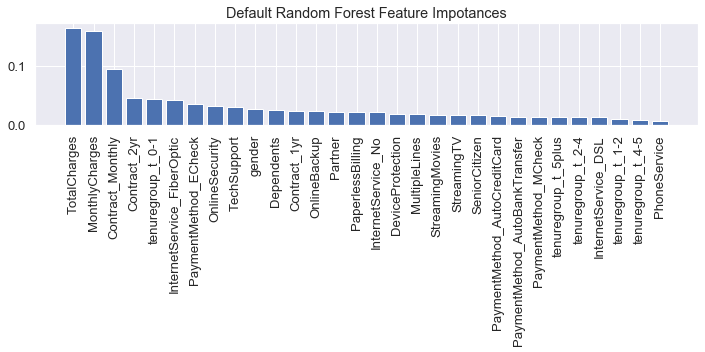

In [89]:
rf_model.feature_importances_
# List Feature Importances
feature_importance = pd.DataFrame({"feature": list(X_train_rf.columns),
                                    "importance":rf_model.feature_importances_}).sort_values("importance", ascending=False)
plt.figure(figsize=(10,5))
plt.bar(x="feature", height="importance", data=feature_importance)
plt.xticks(feature_importance["feature"].tolist(), rotation=90)
plt.title("Default Random Forest Feature Impotances")
plt.tight_layout()

print("Top 10 Features from Default Random Forest")
feature_importance.head(10)

 Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       984
           1       0.81      0.86      0.84       954

    accuracy                           0.84      1938
   macro avg       0.84      0.84      0.84      1938
weighted avg       0.84      0.84      0.84      1938

 Accuracy Score: 
 0.8359133126934984
 Precision: 0.8142292490118577  & Recall Scores: 0.8637316561844863

 F1 Score: 
 0.8382502543234994
 AUC: 
 0.8363373728076904


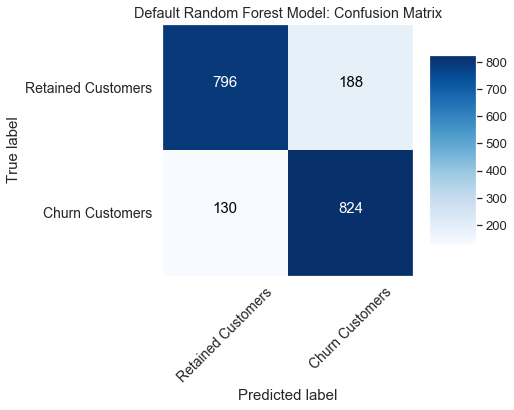

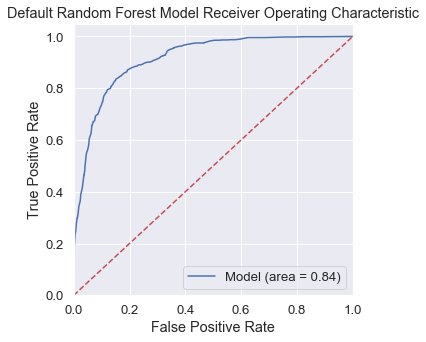

ModelName  AccuracyScore  RecallScore  \
0                        Dummy Baseline       0.737081     0.000000   
1     Default Logistic Regression Model       0.797730     0.805031   
2  HyperTuned Logistic Regression Model       0.933962     0.933962   
3           Default Random Forest Model       0.835913     0.863732   

   PrecisionScore   F1Score  AreaUnderCurve  
0        0.000000  0.000000        0.500000  
1        0.788501  0.796680        0.797841  
2        0.691770  0.794826        0.765253  
3        0.814229  0.838250        0.836337

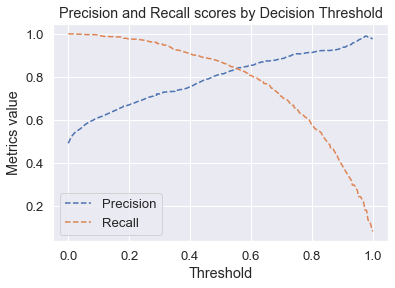

In [90]:
#model_comparison = model_comparison.drop(index=3, axis=0)
model_comparison = model_comparison.append(model_scores(model_name="Default Random Forest Model",
                                                           model = rf_model,
                                                           Xtest = X_test_rf,
                                                           ytest = y_test_rf,
                                                           predictions = rf_pred,
                                                           idx = 3),
                                          ignore_index = False)
model_comparison = model_comparison.drop_duplicates()

y_pred_proba = rf_model.predict_proba(X_test_rf)
plot_precision_recall(y_test_rf, y_pred_proba[:,1])

model_comparison

### Hyperparameter tuning for Random Forest Model

In [112]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 200, 300, 1000], 
    'max_features': ["sqrt", "log2"]
}

# Instantiate the grid search model
cv_rf_model = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring="f1") # 3-fold validation

#Add , scoring="recall" above later on

In [113]:
# Train the best model; Takes around 10 mins! - Get some coffee :)
cv_rf_model.fit(X_train_rf, y_train_rf)
print("Best Parameters:", cv_rf_model.best_params_)
print(f"Best Score after Random Forest HPO: {cv_rf_model.best_score_} \n")
print(f"Best Model Accuracy Score after RF HPO: {cv_rf_model.score(X_test_rf, y_test_rf)}")

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.9min finished


Best Parameters: {'bootstrap': True, 'max_depth': 110, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
Best Score after Random Forest HPO: 0.8313322151459545 

Best Model Accuracy Score after RF HPO: 0.8216976393771974


 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       984
           1       0.79      0.86      0.82       954

    accuracy                           0.82      1938
   macro avg       0.82      0.82      0.82      1938
weighted avg       0.82      0.82      0.82      1938

 Accuracy Score: 
 0.8168214654282766
 Precision: 0.7888138862102217  & Recall Scores: 0.8574423480083857

 F1 Score: 
 0.8216976393771974
 AUC: 
 0.8174406861993149


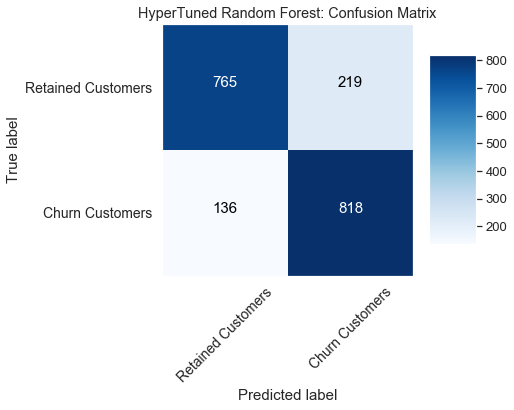

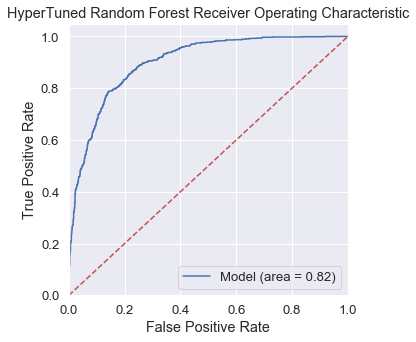

ModelName  AccuracyScore  RecallScore  \
2  HyperTuned Logistic Regression Model       0.933962     0.933962   
3           Default Random Forest Model       0.835913     0.863732   
4              HyperTuned Random Forest       0.818885     0.861635   
1     Default Logistic Regression Model       0.797730     0.805031   
0                        Dummy Baseline       0.737081     0.000000   
2  HyperTuned Logistic Regression Model       0.800000     0.888889   
4              HyperTuned Random Forest       0.816821     0.857442   

   PrecisionScore   F1Score  AreaUnderCurve  
2        0.691770  0.794826        0.765253  
3        0.814229  0.838250        0.836337  
4        0.789625  0.824060        0.819537  
1        0.788501  0.796680        0.797841  
0        0.000000  0.000000        0.500000  
2        0.727273  0.800000        0.782859  
4        0.788814  0.821698        0.817441

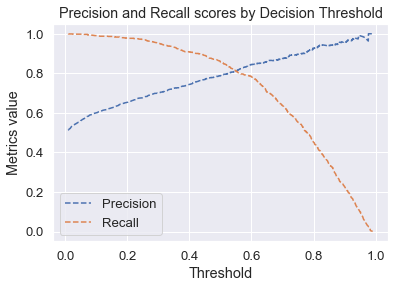

In [114]:
#model_comparison = model_comparison.drop(index=4, axis=0)
best_rf_model = cv_rf_model.best_estimator_
cv_rf_pred = best_rf_model.predict(X_test_rf)

model_comparison = model_comparison.append(model_scores(model_name="HyperTuned Random Forest",
                                                        model = best_rf_model,
                                                        Xtest = X_test_rf,
                                                        ytest = y_test_rf,
                                                        predictions = cv_rf_pred,
                                                        idx = 4), 
                                           ignore_index = False)

model_comparison = model_comparison.drop_duplicates()

y_pred_proba = best_rf_model.predict_proba(X_test_rf)
plot_precision_recall(y_test_rf, y_pred_proba[:,1])
model_comparison

feature  importance
29                TotalCharges    0.137480
18            Contract_Monthly    0.127488
28              MonthlyCharges    0.118755
17                Contract_2yr    0.063330
14  InternetService_FiberOptic    0.058567
21        PaymentMethod_ECheck    0.048614
23           tenuregroup_t_0-1    0.047093
6               OnlineSecurity    0.039994
9                  TechSupport    0.031547
16                Contract_1yr    0.030715

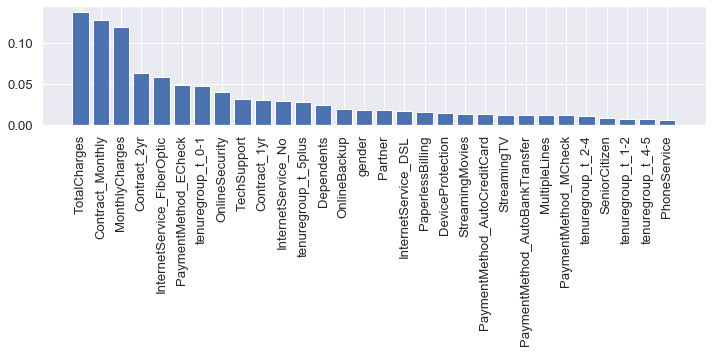

In [115]:
# List Feature Importances
feature_importance = pd.DataFrame({"feature": list(X_train_rf.columns),
                                    "importance":best_rf_model.feature_importances_}).sort_values("importance", ascending=False)
plt.figure(figsize=(10,5))
plt.bar(x="feature", height="importance", data=feature_importance)
plt.xticks(feature_importance["feature"].tolist(), rotation=90)
plt.tight_layout()

feature_importance.head(10)

In [116]:
# Pull out one tree from the Default Random Forest for visualization
est_tree = rf_model.estimators_[5]

graph = Source(tree.export_graphviz(est_tree,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = X_train_rf.columns.tolist(), 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )
#SVG(graph.pipe(format='svg'))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

display(graph)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.413955 to fit


In [118]:
model_comparison = model_comparison.sort_values(by=["F1Score", "RecallScore", "AccuracyScore",], ascending=False) 
model_comparison
#Recall scores are generally more focused than Precision Scores, to reduce false negatives on customers churning.

ModelName  AccuracyScore  RecallScore  \
3           Default Random Forest Model       0.835913     0.863732   
4              HyperTuned Random Forest       0.818885     0.861635   
4              HyperTuned Random Forest       0.816821     0.857442   
2  HyperTuned Logistic Regression Model       0.800000     0.888889   
1     Default Logistic Regression Model       0.797730     0.805031   
2  HyperTuned Logistic Regression Model       0.933962     0.933962   
0                        Dummy Baseline       0.737081     0.000000   

   PrecisionScore   F1Score  AreaUnderCurve  
3        0.814229  0.838250        0.836337  
4        0.789625  0.824060        0.819537  
4        0.788814  0.821698        0.817441  
2        0.727273  0.800000        0.782859  
1        0.788501  0.796680        0.797841  
2        0.691770  0.794826        0.765253  
0        0.000000  0.000000        0.500000

# Final Conclusions on Models:

In [120]:
best_df = pd.DataFrame(columns=["PerfParam", "BestParamVal", "Model"])

best_recall_score = model_comparison["RecallScore"].max()
best_recall_score_model = model_comparison[model_comparison["RecallScore"]==best_recall_score]["ModelName"].tolist()
best_df = best_df.append([{"PerfParam":"RecallScore", 
                           "BestParamVal":best_recall_score, 
                           "Model":best_recall_score_model[0]}], 
                         ignore_index=True)

best_f1_score = model_comparison["F1Score"].max()
best_f1_score_model = model_comparison[model_comparison["F1Score"]==best_f1_score]["ModelName"].tolist()
best_df = best_df.append([{"PerfParam":"F1Score", 
                           "BestParamVal":best_f1_score, 
                           "Model":best_f1_score_model[0]}], 
                         ignore_index=True)

best_accuracy_score = model_comparison["AccuracyScore"].max()
best_accuracy_score_model = model_comparison[model_comparison["AccuracyScore"]==best_accuracy_score]["ModelName"].tolist()
best_df = best_df.append([{"PerfParam":"AccuracyScore", 
                           "BestParamVal":best_accuracy_score, 
                           "Model":best_accuracy_score_model[0]}], 
                         ignore_index=True)

best_auc_score = model_comparison["AreaUnderCurve"].max()
best_auc_score_model = model_comparison[model_comparison["AreaUnderCurve"]==best_auc_score]["ModelName"].tolist()
best_df = best_df.append([{"PerfParam":"AreaUnderCurve", 
                           "BestParamVal":best_auc_score, 
                           "Model":best_auc_score_model[0]}], 
                         ignore_index=True)

best_precision_score = model_comparison["PrecisionScore"].max()
best_precision_score_model = model_comparison[model_comparison["PrecisionScore"]==best_precision_score]["ModelName"].tolist()
best_df = best_df.append([{"PerfParam":"PrecisionScore", 
                           "BestParamVal":best_precision_score, 
                           "Model":best_precision_score_model[0]}], 
                         ignore_index=True)


print("\033[1mFinal Model Performance Assessments: \033[0;0m")
print(f"Best Recall score is for \033[1m {best_recall_score_model[0]}\033[0;0m with \033[1m{best_recall_score :.2%}\033[0;0m")
print(f"Best F1 score is for \033[1m{best_f1_score_model[0]}\033[0;0m with \033[1m{best_f1_score :.2%}\033[0;0m")
print(f"Best accuracy score is for \033[1m{best_accuracy_score_model[0]}\033[0;0m with \033[1m{best_accuracy_score :.2%}\033[0;0m")
print(f"Best AUC score is for \033[1m {best_auc_score_model[0]}\033[0;0m with \033[1m{best_auc_score :.2%}\033[0;0m")
print(f"Best Precision score is for \033[1m {best_precision_score_model[0]}\033[0;0m with \033[1m{best_precision_score :.2%}\033[0;0m")

best_df

Final Model Performance Assessments: 
Best Recall score is for  HyperTuned Logistic Regression Model with 93.40%
Best F1 score is for Default Random Forest Model with 83.83%
Best accuracy score is for HyperTuned Logistic Regression Model with 93.40%
Best AUC score is for  Default Random Forest Model with 83.63%
Best Precision score is for  Default Random Forest Model with 81.42%


PerfParam  BestParamVal                                 Model
0     RecallScore      0.933962  HyperTuned Logistic Regression Model
1         F1Score      0.838250           Default Random Forest Model
2   AccuracyScore      0.933962  HyperTuned Logistic Regression Model
3  AreaUnderCurve      0.836337           Default Random Forest Model
4  PrecisionScore      0.814229           Default Random Forest Model

Percentage of Retained Customers from Test- Random Forest: 47.78%
Percentage of Churn Customers from Test: 52.22%
Count of Retained Customers from Test- Random Forest: 926 out of 1938
Count of Churned Customers from Test- Random Forest: 1012 out of 1938
Percentage of Retained Customers from Test from LR: 39.83%
Percentage of Churn Customers from Test: 60.17%
Count of Retained Customers from Test- LR: 772 out of 1938
Count of Churned Customers from Test- LR: 1166 out of 1938


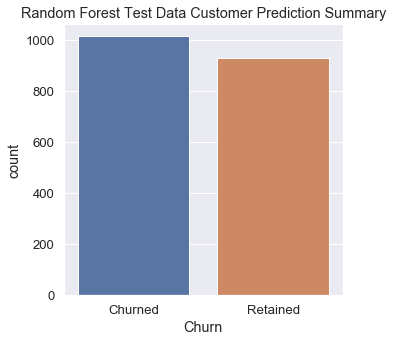

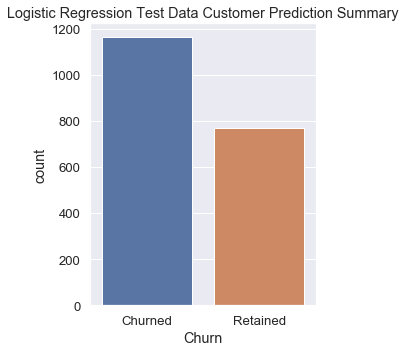

In [124]:
#Random Forest

final_outputs = pd.DataFrame({"Churn":rf_pred})
final_outputs = final_outputs.replace({0:"Retained", 1:"Churned"})

plt.figure(figsize=(5,5))
sns.countplot(data=final_outputs, x="Churn")
count_no = len(final_outputs[final_outputs["Churn"]=="Retained"])
count_yes = len(final_outputs[final_outputs["Churn"]=="Churned"])
print(f"Percentage of Retained Customers from Test- Random Forest: {count_no/(count_no+count_yes) :.2%}")
print(f"Percentage of Churn Customers from Test: {count_yes/(count_no+count_yes) :.2%}")
print(f"Count of Retained Customers from Test- Random Forest: {count_no} out of {count_no+count_yes}")
print(f"Count of Churned Customers from Test- Random Forest: {count_yes} out of {count_no+count_yes}")
plt.title("Random Forest Test Data Customer Prediction Summary")


# Logistic Regression
final_outputs = pd.DataFrame({"Churn":cv_predictions})
final_outputs = final_outputs.replace({0:"Retained", 1:"Churned"})
plt.figure(figsize=(5,5))
sns.countplot(data=final_outputs, x="Churn")
count_no = len(final_outputs[final_outputs["Churn"]=="Retained"])
count_yes = len(final_outputs[final_outputs["Churn"]=="Churned"])

print(f"Percentage of Retained Customers from Test from LR: {count_no/(count_no+count_yes) :.2%}")
print(f"Percentage of Churn Customers from Test: {count_yes/(count_no+count_yes) :.2%}")
print(f"Count of Retained Customers from Test- LR: {count_no} out of {count_no+count_yes}")
print(f"Count of Churned Customers from Test- LR: {count_yes} out of {count_no+count_yes}")
plt.title("Logistic Regression Test Data Customer Prediction Summary")
plt.tight_layout()

In [168]:
## Obs: Based on 


NameError: name 'python' is not defined